# Summary

* [1) Dataset Description](#1.-Dataset-Description)
* [2) Model Description](#2.-Model-Description)
* [3) Data Loading / Data Processing](#3.-Data-Loading-/-Data-Processing)
    * [3.1) Data Loading](#3.1.-Data-Loading)
    * [3.2) Data Exploration](#3.2.-Data-Exploration)
    * [3.3) Data Encoding/Splitting](#3.3.-Data-Encoding-/-Splitting)
* [4) Model Implementation](#4.-Model-Implementation)
    * [4.1) MLP Implementation](#4.1.-MLP-Implementation)
        * [4.1.1) Network Architecture](#4.1.1.-Network-Architecture)
        * [4.1.2) Scorch-Classifier](#4.1.2.-Scorch-Classifier)
        * [4.1.3) Parameter-Implementation](#4.1.3.-Parameter-Implementation)
        * [4.1.4) Hyperparameter Optimisation (RandomSearch)](#4.1.4.-Hyperparameter-Optimisation-[Randomsearch])
        * [4.1.5) Model Final Training and Evaluation](#4.1.5-Model-Training-and-Validation)
        * [4.1.6) Model Evaluation (Testing)](#4.1.6-Model-Evaluation-[Testing])
        * [4.1.7) Model results](#4.1.7-Model-results)
    * [4.2) SVM Implementation](#4.2.-SVM-Implementation)
        * [4.2.1) SVC Architecture](#4.2.1-Network-Architecture)
        * [4.2.2) SVC Classifier](#4.2.2-SVC-Classifier)
        * [4.2.3) Parameter-Implementation](#4.2.3-Parameter-Implementation)
        * [4.2.4) Hyperparameter Optimisation (RandomSearch)](#4.2.4-Parameter-Optimisation)
        * [4.2.5) Model Final Training and Evaluation](#4.2.5-Model-Training-and-Validation)
        * [4.2.6) Model Evaluation (Testing)](#4.2.6-Model-Evaluation-[Testing])
        * [4.2.7) Model results](#4.2.7-Model-results)
* [5) Evaluation of best models](#5-Evaluation-of-best-models)
* [6) Conclusion](#6-Conclusion)
* [7) Models reproducibility](#7.-Models-reproducibility)


## 1. Dataset Description

### Input variables:


### Bank client data:
- 1 - age (numeric)
- 2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- 4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- 5 - default: has credit in default? (categorical: 'no','yes','unknown')
- 6 - housing: has housing loan? (categorical: 'no','yes','unknown')
- 7 - loan: has personal loan? (categorical: 'no','yes','unknown')

- #### related with the last contact of the current campaign:

- 8 - contact: contact communication type (categorical: 'cellular','telephone')
- 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- 10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

- #### other attributes:
- 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- 14 - previous: number of contacts performed before this campaign and for this client (numeric)
- 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

- #### social and economic context attributes
- 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
- 17 - cons.price.idx: consumer price index - monthly indicator (numeric)
- 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
- 20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
- 21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

## Define Global Constants

In [ ]:
# num_instances = 0  
# test_ratio = 0.3
# test_size = int(num_instances * 0.3)
# train_size = num_instances - test_size
# #n_iter = 40

### Import libraries

We define below all the libraries which will be utilized along the coursework

In [ ]:
!pip install scikit-learn
#!pip install six
!pip install imbalanced-learn
!pip install category_encoders
!pip install pytorch_lightning 
!pip install skorch
!pip install torchviz
#!pip install collections
!pip install -U git+https://github.com/scikit-learn-contrib/imbalanced-learn.git


In [3]:
# Basic libraries for data exploration and preprocessing
import six
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from itertools import combinations
from scipy.stats import chi2_contingency
import category_encoders as ce
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler
import matplotlib.ticker as mticker
from matplotlib.colors import Normalize

#from google.colab import files

# Library to measure time between executions
import time
from datetime import datetime
import math
from math import sqrt
from itertools import zip_longest

# Import basic calculations
from numpy import sqrt
from numpy import argmax

# Libraries to apply metric scores and support the model selection
from sklearn.metrics import confusion_matrix, precision_recall_curve,auc, roc_auc_score, roc_curve, recall_score, \
classification_report,accuracy_score, fbeta_score, make_scorer, average_precision_score, precision_score, f1_score
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV, learning_curve

# Library to apply oversampling algorithm and plot imbalanced dataset using SMOTE
#from collections import Counter

from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler, OneSidedSelection
from scipy.stats import loguniform, randint, uniform


# Support Vector Machine Imports
from sklearn import datasets
from sklearn import metrics
from sklearn.svm import SVC


# Pytorch related libraries to use with MLP implementation
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.autograd import Variable
import torch.nn.functional as F 
from torch import optim # PyTorch optimizer
#from pytorch_lightning.metrics import Accuracy
from torch.optim import Optimizer
from pytorch_lightning import metrics

# Library to implement Pipeline
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline 
from imblearn.pipeline import Pipeline as imbPipeline

# Import from skorch 
from skorch.callbacks import EpochScoring, BatchScoring, EarlyStopping, Callback, Checkpoint
from skorch import NeuralNetClassifier, NeuralNetBinaryClassifier
#from skorch.history import History

# Support Vector Machine Imports
from sklearn import datasets
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

# Scikitplot library to plot Confusion Matrix, ROC and Precision x Recall Curves
#import scikitplot as skplt

# Visualize NN architecture
from torchviz import make_dot

# Import pickle Package to save best learning models (MLP and SVM)
import pickle as pkl
from joblib import dump, load

if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")


# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



### Auxiliary functions

In [12]:

class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

def div0( a, b ):
    """ ignore / 0, div0( [-1, 0, 1], 0 ) -> [0, 0, 0] """
    with np.errstate(divide='ignore', invalid='ignore'):
        c = np.true_divide( a, b )
        c[~np.isfinite( c )] = 0  # -inf inf NaN
    return c


def plot_confusion_matrix2(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


    
def plot_confusion_matrix(cf_matrix, target_names=None,plot_type='',savefig='No'):

    group_names = ['TN', 'FP', 'FN', 'TP']
    group_counts = ["{0:.0f}".format(value) for value in 
                    cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in 
                         cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in 
              zip(group_names,
                  group_counts,
                  group_percentages)
             ]
    labels = np.asarray(labels).reshape(2, 2)

    fig = plt.figure(figsize = (14, 8))
    res = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues',  annot_kws={"size": 14})
    
    if target_names:
        tick_marks = range(len(target_names))
        plt.xticks(tick_marks, target_names)
        plt.yticks(tick_marks, target_names)
    
    plt.xticks([0.5,1.5], target_names,va='center')
    plt.yticks([0.5,1.5], target_names,va='center')

    precision = cf_matrix[1, 1] / sum(cf_matrix[:, 1])
    recall    = cf_matrix[1, 1] / sum(cf_matrix[1,:])
    accuracy  = np.trace(cf_matrix) / float(np.sum(cf_matrix))
    f1_score  = 2 * precision * recall / (precision + recall)
    stats_text = "\n\n\nPrecision.={:0.3f}\nRecall={:0.3f}\n\nAccuracy={:0.3f}\nF1 Score={:0.3f}".format(
        precision, recall, accuracy, f1_score)
    plt.xlabel('Predicted label {}'.format(stats_text),fontsize=12)
    plt.ylabel("True Label", fontsize=12)
    plt.show()
    if savefig=='Yes':
        fig.savefig('plot_confusion_matrix_' + plot_type + '_' + datetime.now().strftime("%Y_%m_%d_%H_%M_%S") + '.png')


def plot_pr_auc_thresholds(precision, recall, thresh, y_test, y_pred_proba, plot_type='',savefig='No'):
    
    pr_df = pd.DataFrame(zip_longest(precision, recall, thresh),columns = ["Precision","Recall","Threshold"])

    # convert to f score
    fscore = div0((2 * precision * recall), (precision + recall)) 
    # locate the index of the largest f score
    ix = np.argmax(fscore)


    fig = px.area(pr_df, x='Precision',y='Recall',hover_data=['Threshold'],title='PR-AUC (' + plot_type + ')')

    
    no_skill = len(y_test[y_test==1]) / len(y_test)
    fig.add_shape(type='line',
                x0=0,
                y0=no_skill,
                x1=1,
                y1=no_skill,
                line=dict(color='Black',dash= 'dash'),
                xref='x',
                yref='y'
    )
    
    fig.add_trace(go.Scatter(
        x=[0.5],
        y=[no_skill+0.05],
        mode="text",
        text=["Random Classifier:(P:N = 1:9)"],
        textposition="bottom center",
        textfont=dict(
            family="Arial Black",
            size=14,
            color="Black"
        )
    ))
    
    for i in range(len(pr_df)):
        if i%(len(pr_df)/20)==0:
            fig.add_annotation(x=pr_df.iloc[i][0],y=pr_df.iloc[i][1],
                               text=f'Thresh={pr_df.iloc[i][2]:.2f}',
                               showarrow=True,arrowhead=1)

    fig.add_annotation(x=pr_df.iloc[ix][0],y=pr_df.iloc[ix][1],
                       text=f'Optimal Thresh={fscore[ix]:.2f}', 
                       showarrow=True,arrowcolor='red',
                       bgcolor='white',bordercolor='black',borderwidth=1,
                       font=dict(size=16,color="#FF0000"))
    
    fig.add_annotation(x=0.5,y=0.5,text=f'AUC={average_precision_score(y_test, y_pred_proba):.2f}', 
                       showarrow=False,font=dict(size=20,color="#FF0000",family="Arial Black"))
    
    fig.layout.update(showlegend=False)
    
    if savefig=='Yes':
        fig.savefig('plot_precision_recall' + plot_type + '_' + datetime.now().strftime("%Y_%m_%d_%H_%M_%S") + '.png')
        
    fig.show()



def precision_recall_threshold(p, r, thresholds, y_test, y_pred_proba, t=0.5, plot_type='',savefig='No'):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """
    font = {'family': 'Arial',
        'color':  'red',
        'weight': 'normal',
        'size': 18,
        }
    # convert to f score
    fscore = div0((2 * precision * recall), (precision + recall)) 
    # locate the index of the largest f score
    ix = np.argmax(fscore)

    # plot the curve
    plt.figure(figsize=(10,10))
    plt.title('PR-AUC (' + plot_type + ')')
    plt.step(r, p, color='b', alpha=0.2,
             where='post')
    no_skill = len(y_test[y_test==1]) / len(y_test)
    plt.plot([0,1], [no_skill,no_skill], linestyle='--', color='black')
    plt.fill_between(r, p, step='post', alpha=0.2,
                     color='b')
    plt.text(0.0, no_skill + 0.03, 'Random Classifier:(P:N = 1:9)', color='black',fontsize=16)
    plt.text(0.45, 0.3, 'AUC = %s'% (round(average_precision_score(y_test, y_pred_proba),2)), fontdict=font)
    plt.text(r[ix], p[ix]+0.03,'Optimized Threshold', color='red',fontsize=14)
    plt.scatter(r[ix], p[ix], marker='o', color='red')
    plt.ylim([-0.05, 1.05]);
    plt.xlim([-0.05, 1.05]);
    plt.xlabel('Recall',fontsize=16);
    plt.ylabel('Precision',fontsize=16);
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
             
    # plot the current threshold on the line
    close_default_clf = np.argmin(np.abs(thresholds - t))
    plt.plot(r[close_default_clf], p[close_default_clf], '^', c='k',
            markersize=15)
    


class Dataset(torch.utils.data.Dataset):
  #'Characterizes a dataset for PyTorch'
    def __init__(self, features, labels):
        'Initialization'
        self.labels = labels
        self.features = features

    def __len__(self):
        'Denotes the total number of samples'
        return len(self.features)

    def __getitem__(self, index):
        'Generates one sample of data'
        # Select sample
        ID = self.features[index]

        # Load data and get label
        X = torch.load(ID)
        y = self.labels[ID]

        return X, y



def plot_roc_auc_thresholds(fpr, tpr, thresh, y_test, y_pred_proba, plot_type='',savefig='No'):
    
    roc_df = pd.DataFrame(zip_longest(fpr, tpr, thresh),columns = ["FPR","TPR","Threshold"])

    # calculate the g-mean for each threshold
    gmeans = np.sqrt(tpr * (1-fpr))
    # locate the index of the largest g-mean
    ix = np.argmax(gmeans)
    

    fig = px.area(roc_df, x='FPR',y='TPR',hover_data=['Threshold'],title='ROC-AUC (' + plot_type + ')')

    no_skill = len(y_test[y_test==1]) / len(y_test)
    fig.add_shape(type='line',
                x0=0,
                y0=0,
                x1=1,
                y1=1,
                line=dict(color='Black',dash= 'dash'),
                xref='x',
                yref='y'
    )
    
    fig.add_trace(go.Scatter(
        x=[0.25],
        y=[0.1],
        mode="text",
        text=["Random Classifier:(P:N = 1:9)"],
        textposition="bottom center",
        textfont=dict(
            family="Arial Black",
            size=14,
            color="Black"
        )
    ))
    
    for i in range(len(roc_df)):
        if i%(len(roc_df)/20)==0:
            fig.add_annotation(x=roc_df.iloc[i][0],y=roc_df.iloc[i][1],
                               text=f'Thresh={roc_df.iloc[i][2]:.2f}',
                               showarrow=True,arrowhead=1)

    fig.add_annotation(x=roc_df.iloc[ix][0],y=roc_df.iloc[ix][1],
                       text=f'Optimal Thresh={gmeans[ix]:.2f}', 
                       showarrow=True,arrowcolor='red',
                       bgcolor='white',bordercolor='black',borderwidth=1,
                       font=dict(size=16,color="#FF0000"))

    fig.add_annotation(x=0.5,y=0.5,text=f'AUC={roc_auc_score(y_test, y_pred_proba):.2f}', 
                       showarrow=False,font=dict(size=20,color="#FF0000",family="Arial Black"))

    fig.layout.update(showlegend=False)
    
    if savefig=='Yes':
        fig.savefig('plot_roc_auc_' + plot_type + '_' + datetime.now().strftime("%Y_%m_%d_%H_%M_%S") + '.png')
        
    fig.show()


def plot_roc_curve(fpr, tpr, label=None):
    """
    The ROC curve, modified from 
    Hands-On Machine learning with Scikit-Learn and TensorFlow; p.91
    """
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc='best')
    


Define AdaBound algorithm Class to use as one of the Neural Networks optimizers.

In [14]:

class AdaBound(Optimizer):
    """  AdaBound code from https://github.com/Luolc/AdaBound/blob/master/adabound/adabound.py
    Implements AdaBound algorithm.
    It has been proposed in `Adaptive Gradient Methods with Dynamic Bound of Learning Rate`_.
    Arguments:
        params (iterable): iterable of parameters to optimize or dicts defining
            parameter groups
        lr (float, optional): Adam learning rate (default: 1e-3)
        betas (Tuple[float, float], optional): coefficients used for computing
            running averages of gradient and its square (default: (0.9, 0.999))
        final_lr (float, optional): final (SGD) learning rate (default: 0.1)
        gamma (float, optional): convergence speed of the bound functions (default: 1e-3)
        eps (float, optional): term added to the denominator to improve
            numerical stability (default: 1e-8)
        weight_decay (float, optional): weight decay (L2 penalty) (default: 0)
        amsbound (boolean, optional): whether to use the AMSBound variant of this algorithm
    .. Adaptive Gradient Methods with Dynamic Bound of Learning Rate:
        https://openreview.net/forum?id=Bkg3g2R9FX
    """

    def __init__(self, params, lr=1e-3, betas=(0.9, 0.999), final_lr=0.1, gamma=1e-3,
                 eps=1e-8, weight_decay=0, amsbound=False):
        if not 0.0 <= lr:
            raise ValueError("Invalid learning rate: {}".format(lr))
        if not 0.0 <= eps:
            raise ValueError("Invalid epsilon value: {}".format(eps))
        if not 0.0 <= betas[0] < 1.0:
            raise ValueError("Invalid beta parameter at index 0: {}".format(betas[0]))
        if not 0.0 <= betas[1] < 1.0:
            raise ValueError("Invalid beta parameter at index 1: {}".format(betas[1]))
        if not 0.0 <= final_lr:
            raise ValueError("Invalid final learning rate: {}".format(final_lr))
        if not 0.0 <= gamma < 1.0:
            raise ValueError("Invalid gamma parameter: {}".format(gamma))
        defaults = dict(lr=lr, betas=betas, final_lr=final_lr, gamma=gamma, eps=eps,
                        weight_decay=weight_decay, amsbound=amsbound)
        super(AdaBound, self).__init__(params, defaults)

        self.base_lrs = list(map(lambda group: group['lr'], self.param_groups))

    def __setstate__(self, state):
        super(AdaBound, self).__setstate__(state)
        for group in self.param_groups:
            group.setdefault('amsbound', False)

    def step(self, closure=None):
        """Performs a single optimization step.
        Arguments:
            closure (callable, optional): A closure that reevaluates the model
                and returns the loss.
        """
        loss = None
        if closure is not None:
            loss = closure()

        for group, base_lr in zip(self.param_groups, self.base_lrs):
            for p in group['params']:
                if p.grad is None:
                    continue
                grad = p.grad.data
                if grad.is_sparse:
                    raise RuntimeError(
                        'Adam does not support sparse gradients, please consider SparseAdam instead')
                amsbound = group['amsbound']

                state = self.state[p]

                # State initialization
                if len(state) == 0:
                    state['step'] = 0
                    # Exponential moving average of gradient values
                    state['exp_avg'] = torch.zeros_like(p.data)
                    # Exponential moving average of squared gradient values
                    state['exp_avg_sq'] = torch.zeros_like(p.data)
                    if amsbound:
                        # Maintains max of all exp. moving avg. of sq. grad. values
                        state['max_exp_avg_sq'] = torch.zeros_like(p.data)

                exp_avg, exp_avg_sq = state['exp_avg'], state['exp_avg_sq']
                if amsbound:
                    max_exp_avg_sq = state['max_exp_avg_sq']
                beta1, beta2 = group['betas']

                state['step'] += 1

                if group['weight_decay'] != 0:
                    grad = grad.add(group['weight_decay'], p.data)

                # Decay the first and second moment running average coefficient
                exp_avg.mul_(beta1).add_(1 - beta1, grad)
                exp_avg_sq.mul_(beta2).addcmul_(1 - beta2, grad, grad)
                if amsbound:
                    # Maintains the maximum of all 2nd moment running avg. till now
                    torch.max(max_exp_avg_sq, exp_avg_sq, out=max_exp_avg_sq)
                    # Use the max. for normalizing running avg. of gradient
                    denom = max_exp_avg_sq.sqrt().add_(group['eps'])
                else:
                    denom = exp_avg_sq.sqrt().add_(group['eps'])

                bias_correction1 = 1 - beta1 ** state['step']
                bias_correction2 = 1 - beta2 ** state['step']
                step_size = group['lr'] * math.sqrt(bias_correction2) / bias_correction1

                # Applies bounds on actual learning rate
                # lr_scheduler cannot affect final_lr, this is a workaround to apply lr decay
                final_lr = group['final_lr'] * group['lr'] / base_lr
                lower_bound = final_lr * (1 - 1 / (group['gamma'] * state['step'] + 1))
                upper_bound = final_lr * (1 + 1 / (group['gamma'] * state['step']))
                step_size = torch.full_like(denom, step_size)
                step_size.div_(denom).clamp_(lower_bound, upper_bound).mul_(exp_avg)

                p.data.add_(-step_size)

        return loss

## 3. Data Loading / Data Processing

#### Define global constants

In [ ]:
#pd.options.display.max_rows
#pd.get_option("display.max_columns") #Default (20)
pd.set_option('display.max_columns',70)

Now we will load the Bank Marketing dataset that will be used for the analysis and critical evaluation between SVM and MLP algorithms.

### Load input file

In [6]:
# Load bank-additional-full.csv file
df = pd.read_csv('bank-additional-full.csv', delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### Print basic statistics

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

#### Drop Duration variable

As stated in the dataset description the Duration column is not relevant for prediction purposes, since it is highly correlated to the target variable. So we will drop this column beforehand.

In [7]:
df.drop(columns=['duration'],inplace=True,errors='ignore')

#### Unique values count

And we count again the unique values after dropping the variable.

In [ ]:
df.nunique()

age                78
job                12
marital             4
education           8
default             3
housing             3
loan                3
contact             2
month              10
day_of_week         5
campaign           42
pdays              27
previous            8
poutcome            3
emp.var.rate       10
cons.price.idx     26
cons.conf.idx      26
euribor3m         316
nr.employed        11
y                   2
dtype: int64

#### Columns basic information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

#### Quantitative variables: age, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed  
#### Categorical variables: job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome

### Exploratory Data Analysis

% of Subscription of term deposit (No) 88.73
% of Subscription of term deposit (Yes) 11.27


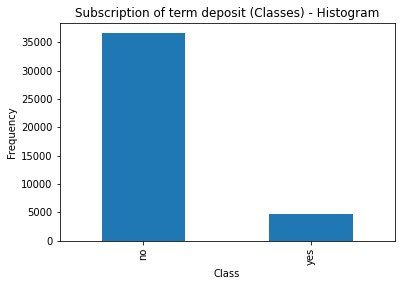

In [ ]:
pd.value_counts(df['y']).plot.bar()
plt.title('Subscription of term deposit (Classes) - Histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
df['y'].value_counts()

print('% of Subscription of term deposit (No)', round(len(df[df.y=='no']) / len(df.index) * 100,2) )
print('% of Subscription of term deposit (Yes)', round(len(df[df.y=='yes']) / len(df.index) * 100,2) )

As seen above we have abinary classification problem with highly class-imbalanced data characterized of a ratio approximately 1:9 between the minority ('yes') and majority ('no') classes respectively. So we should evaluate the application of a method to result in a better balanced dataset.

### Missing values

We will investigate the dataset for missing values in the columns

In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


We will split the data processing between quantitative and categorical (ordinal/nominal) variables

### Quantitative variable analysis (Distribution of features vs classes)

First let's see what is the distribution of quantitative variables

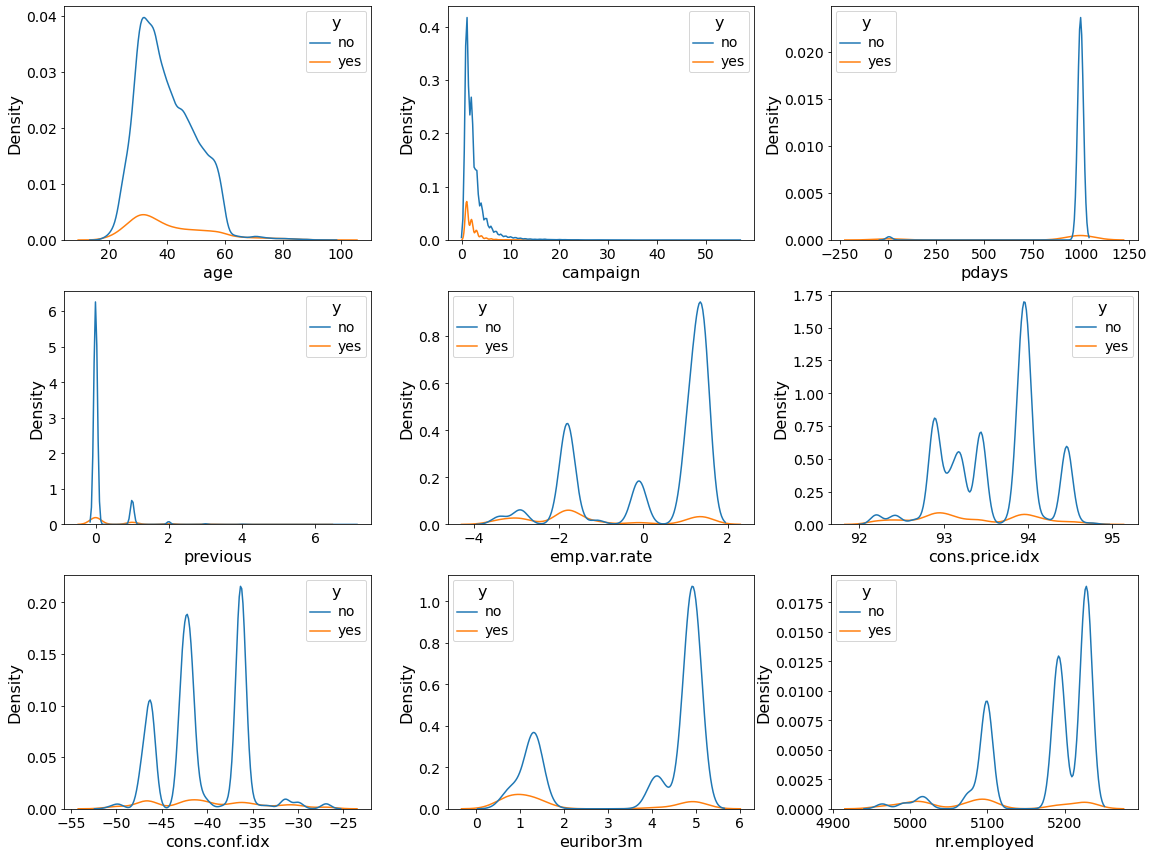

In [8]:
quant_var = ['age','campaign','pdays','previous','emp.var.rate',
             'cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

quant_var_tgt = ['age','campaign','pdays','previous','emp.var.rate',
             'cons.price.idx','cons.conf.idx','euribor3m','nr.employed','y']

#df.hist(column=quant_var,figsize=(16,10))


f, axes = plt.subplots(3, 3, figsize=(16, 12))
for ax, feature in zip(axes.flat, quant_var):
    graph1 = sns.kdeplot(data=df, x=feature, hue='y', alpha=0.4, ax=ax)
    ax.xaxis.get_label().set_fontsize(16)
    ax.yaxis.get_label().set_fontsize(16)
    xticks_loc = ax.get_xticks().tolist()
    yticks_loc = ax.get_yticks().tolist()
    ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
    plt.setp(ax.get_legend().get_texts(), fontsize='14') # for legend text
    plt.setp(ax.get_legend().get_title(), fontsize='16') # for legend title

    
plt.tight_layout()

plt.show()
#f.savefig('continuous_distribution_plot.png')

### Box plot distribution of quantitative variables

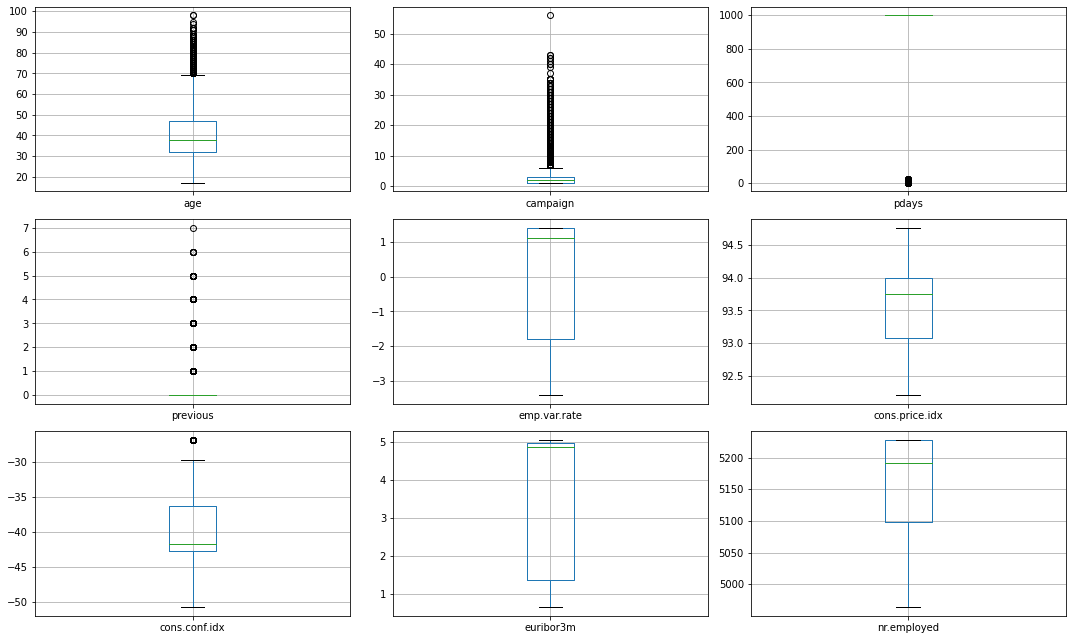

In [ ]:
fig, axes = plt.subplots(3,3,figsize=(15,9))

for i,el in enumerate(quant_var):
    a = df.boxplot(el, ax=axes.flatten()[i])
    #a = df.boxplot(el, by='y', ax=axes.flatten()[i])

#fig.delaxes(axes[1,1]) # remove empty subplot
plt.tight_layout() 


Ideally we would like to verify if there is any high correlation between the independent quantitative variables.

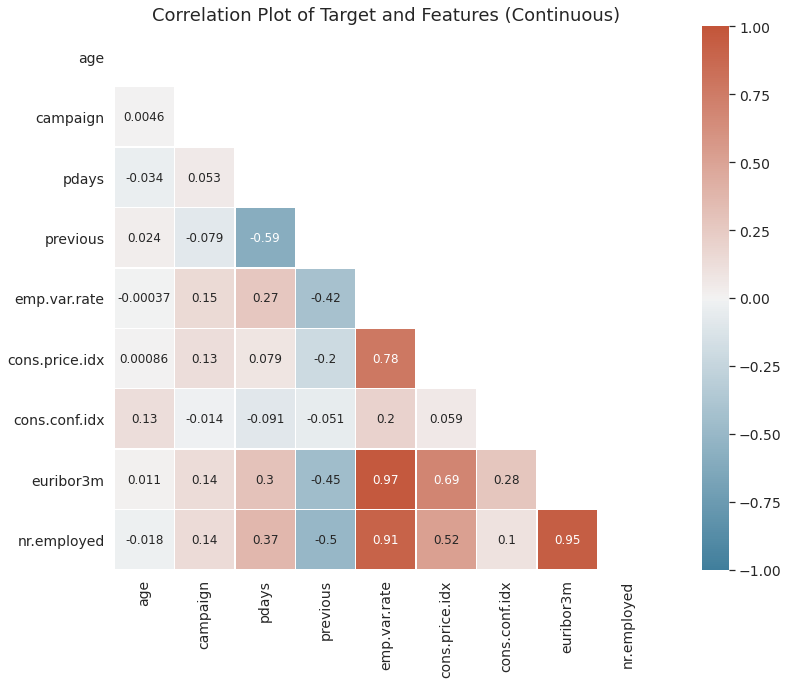

In [31]:
sns.set_theme(style="white")

corr_plot_var = quant_var + ['y']

# Compute the correlation matrix
corr = df[corr_plot_var].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(corr, mask=mask, cmap=cmap,  vmin=-1.0, vmax=1.0, center=0,
            square=True, linewidths=.5, annot=True, annot_kws={"size": 12})

ax.xaxis.get_label().set_fontsize(16)
ax.yaxis.get_label().set_fontsize(16)
ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
# use matplotlib.colorbar.Colorbar object

cbar = ax.collections[0].colorbar
# here set the labelsize by 14
cbar.ax.tick_params(labelsize=14)

plt.title('Correlation Plot of Target and Features (Continuous)',fontsize=18)


#plt.savefig('continuous_correlation_plot.png')
plt.show()

No high correlation (assuming an absolute value of more than 0.5) was observed between the quantitative variables so we will proceed the analysis considering all the quantitative variables initially selected.

#### After analysing the quantitative variables we still have to investigate the remaining categorical variables.

 Ordinal
- default         
- housing         
- loan  
- poutcome 
- contact
- month           
- day_of_week

Nominal
- job             
- marital         
- education                              

### Categorical variables

We shall divide the analysis between Ordinal and Nominal variables and apply the necessary transformations for the training and test set independently. Ordinal variables should be handled taking into consideration the scale between the values from a discrete space. As for the Nominal variables we could create one column for each value they assume. 

Specifically for the contact variable we will consider as an Ordinal variable due to assuming only 2 values and expect to eliminate redundancies if we encode to two columns. 

In [9]:
categ_var = ['default','housing','loan','poutcome','contact','job',
             'marital','education','month','day_of_week']


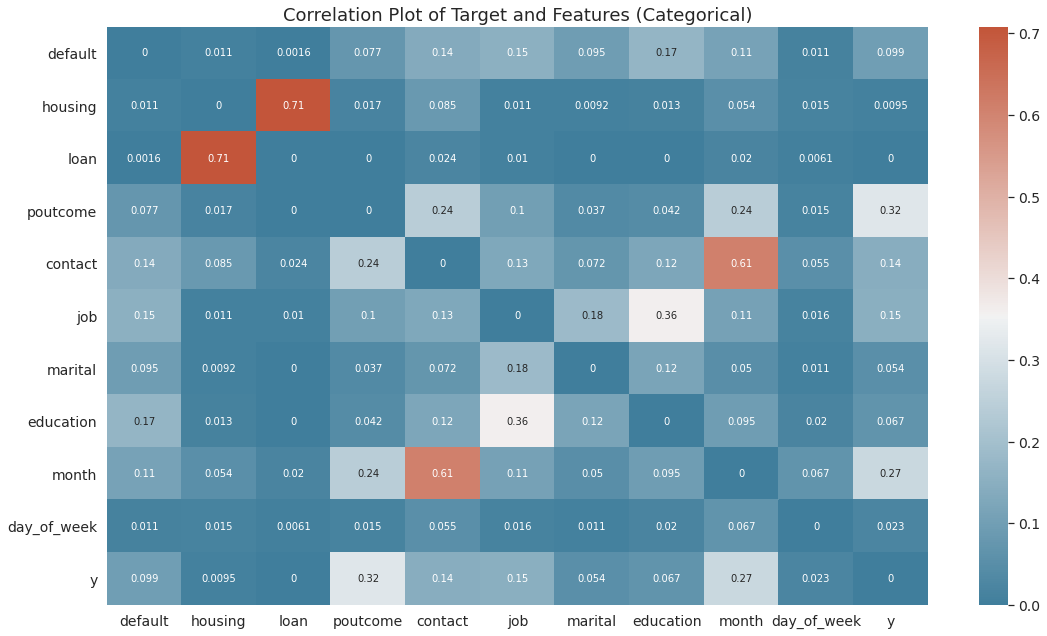

In [ ]:

def cramers_corrected_stat(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))


cols = categ_var + ['y']
corrM = np.zeros((len(cols),len(cols)))
# there's probably a nice pandas way to do this
for col1, col2 in combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_corrected_stat(pd.crosstab(df[col1], df[col2]))
    corrM[idx2, idx1] = corrM[idx1, idx2]

corr = pd.DataFrame(corrM, index=cols, columns=cols)
fig, ax = plt.subplots(figsize=(16, 9))
ax = sns.heatmap(corr, annot=True,  annot_kws={"size": 10}, cmap=cmap,ax=ax)
ax.xaxis.get_label().set_fontsize(16)
ax.yaxis.get_label().set_fontsize(16)
ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
    

cbar = ax.collections[0].colorbar
# here set the labelsize by 14
cbar.ax.tick_params(labelsize=14)

ax.set_title("Correlation Plot of Target and Features (Categorical)", fontsize=18)

plt.tight_layout()
#fig.savefig('cramer_categorical_corr_plot.png')

#### Ordinal variables

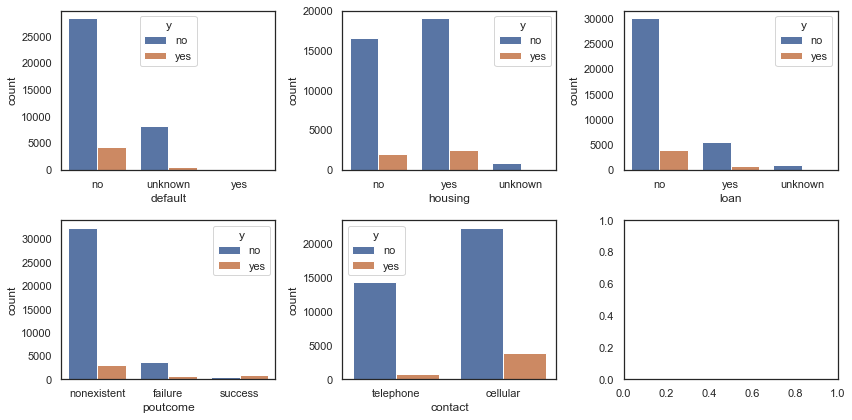

In [ ]:
fig, ax = plt.subplots(2,3,figsize=(12,6))

sns.countplot(x='default',data=df,hue='y',ax=ax[0][0])
sns.countplot(x='housing',data=df,hue='y',ax=ax[0][1])
sns.countplot(x='loan',data=df,hue='y',ax=ax[0][2])
sns.countplot(x='poutcome',data=df,hue='y',ax=ax[1][0])
sns.countplot(x='contact',data=df,hue='y',ax=ax[1][1])

fig.tight_layout()

In [ ]:
# Default
display(df['default'].value_counts())

# Housing
display(df['housing'].value_counts())

# Loan
display(df['loan'].value_counts())

# Poutcome
display(df['poutcome'].value_counts())

# Contact
display(df['contact'].value_counts())

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

cellular     26144
telephone    15044
Name: contact, dtype: int64

Next we can encode the 'Yes','No','Unknown' values and 'Failure','Nonexistent','Success' from (Default, Housing, Loan, and Poutcome respectively) to ordinal numbers, because they represent scales of values in a discrete space, differently from other categorical variables which can experience a certain increase in their category size. Moreover, we know the relationship between the categories.

Therefore, each value would have a different contribution to the target variable. We will consider the OrdinalEncoder method from sklearn and define the order of categories as the following: 
'Yes'/'Failure' then 'Unknown'/'Nonexistent' and lastly 'No'/'Success' and will be mapped to integer numerical values to be used as input values of the neural network subsequently. 

To accomplish this we will implement the transformation inside the transform_input function (below) and create a new dataframe containing only the ordinal variables to be added later to the rest of the variables.

In [ ]:
# enc = OrdinalEncoder(categories=[['yes','unknown','no']]*3)
# Encode Default, Housing, Loan variables
# df_ordinal = df[['default','housing', 'loan','poutcome','contact']].copy()
# df_ordinal[['default','housing', 'loan']] = enc.fit_transform(df_ordinal[['default','housing', 'loan']])

# Encode Poutcome variable
# enc = OrdinalEncoder(categories=[['failure','nonexistant','success']])
# df_ordinal[['poutcome']] = enc.fit_transform(df_ordinal[['poutcome']])

# Encode Contact variable
# enc = OrdinalEncoder(categories=[['cellular','telephone']])
# df_ordinal[['contact']] = enc.fit_transform(df_ordinal[['contact']])

#### Nominal variables

Let's investigate the values assumed by the 3 remaining variables (Job/Marital/Education) to verify if any of the variables has a distance relation between values and can be transformed in a ordinal column.

In [ ]:
# Job
print('Job')
display(df['job'].value_counts())

# Marital
print('Marital')
display(df['marital'].value_counts())

# Education
print('Education')
display(df['education'].value_counts())

Job


admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

Marital


married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

Education


university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [10]:
# Create dummy variables
nom_var = ['job','marital','education'] 
df_nom_var = pd.get_dummies(df[nom_var], columns=nom_var, drop_first=True)

# Save name of the onehot columns
onehot_var = df_nom_var.columns

In [ ]:
onehot_var

Index(['job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed'],
      dtype='object')

In [ ]:
df.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

<AxesSubplot:xlabel='month', ylabel='count'>

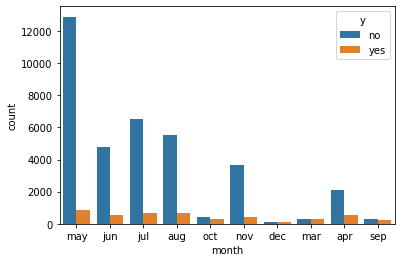

In [ ]:
sns.countplot(x='month',data=df,hue='y')

### Split dataset

Before applying transformation of categorical variables we should first split the data between training and test sets. One of the reasons we consider this approach is if for instance there is a rare category from one categorical variable in one (or more) of the dataset variables and this category could be in the unseen data (test set). Therefore, we cannot include this category in the training set to avoid data leakage and exposing the test data to the full distribution.

As a best practice we should encode variables by applying the fit on the encoded training dataset, then apply it on both training and test datasets.

In [11]:
# Define features and target variables accordingly
X = df.drop('y', axis=1).values
y = df['y'].values
y = y.reshape(y.shape[0], 1)

In [12]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
print(len(X_train_raw), len(X_test_raw))
print(X_train_raw.shape, y_train.shape)
print(X_test_raw.shape, y_test.shape)

32950 8238
(32950, 19) (32950, 1)
(8238, 19) (8238, 1)


### Prepare data (Input variables / Target variables)

In [13]:
# Transform input variables
def transform_input(X_train, X_test, quant_var, nom_var, onehot_var, df):
    # Reconstruct features set
    X_train_df = pd.DataFrame(X_train, columns = df.drop('y', axis=1).columns)
    X_test_df = pd.DataFrame(X_test, columns = df.drop('y', axis=1).columns)
    
    # Define quantitative variables
    train_df_quant = X_train_df[quant_var]
    test_df_quant = X_test_df[quant_var]
    
    # Define Ordinal Encoder for Default, Housing, Loan variables
    ordn = OrdinalEncoder(categories=[['yes','unknown','no']]*3)    
    # Fit
    ordn.fit(X_train_df[['default','housing', 'loan']]) #train_df_ordinal[['default','housing', 'loan']])
    # Transform
    X_train_ord1 = ordn.transform(X_train_df[['default','housing', 'loan']])
    X_test_ord1 = ordn.transform(X_test_df[['default','housing', 'loan']])
    
    
    # Define Ordinal Encoder for Poutcome variable
    ordn = OrdinalEncoder(categories=[['failure','nonexistent','success']])
    # Fit
    ordn.fit(np.array(X_train_df['poutcome']).reshape(-1,1))
    # Transform
    X_train_ord2 = ordn.transform(X_train_df[['poutcome']])
    X_test_ord2 = ordn.transform(X_test_df[['poutcome']])
    
     # Define Ordinal Encoder for Contact variable
    ordn = OrdinalEncoder(categories=[['cellular','telephone']])
    # Fit
    ordn.fit(np.array(X_train_df['contact']).reshape(-1,1))
    # Transform
    X_train_ord3 = ordn.transform(X_train_df[['contact']])
    X_test_ord3 = ordn.transform(X_test_df[['contact']])
    
    # Define Ordinal Encoder for Contact variable
    ordn = OrdinalEncoder(categories=[['mon','tue','wed','thu','fri']])
    # Fit
    ordn.fit(np.array(X_train_df['day_of_week']).reshape(-1,1))
    # Transform
    X_train_ord4 = ordn.transform(X_train_df[['day_of_week']])
    X_test_ord4 = ordn.transform(X_test_df[['day_of_week']])
    
    
    # Define Ordinal Encoder for Month variable
    ordn = ce.OrdinalEncoder(cols=['month'], return_df=True, mapping = [{
                           'col': 'month', 'mapping': { 
                           'jan': 1, 'feb': 2, 'mar': 3, \
                           'apr': 4, 'may': 5, 'jun': 6,  'jul': 7, \
                           'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}}])

    # Fit
    ordn.fit(X_train_df['month'])
    # Transform
    X_train_ord5 = ordn.transform(X_train_df[['month']])
    X_test_ord5 = ordn.transform(X_test_df[['month']])
    
    
    # Define OneHot Encoder
    ohe = OneHotEncoder(handle_unknown='error') #,drop='first',
    # Fit
    ohe.fit(X_train_df[nom_var])
    onehot_list = ohe.get_feature_names(nom_var)
    # Transform
    X_train_nom = ohe.transform(X_train_df[nom_var])
    X_test_nom = ohe.transform(X_test_df[nom_var])
    
    # Create dataframe (training)
    train_df_ord1 = pd.DataFrame(X_train_ord1, columns = ['default','housing', 'loan'])
    train_df_ord2 = pd.DataFrame(X_train_ord2, columns = ['poutcome'])
    train_df_ord3 = pd.DataFrame(X_train_ord3, columns = ['contact'])
    train_df_ord4 = pd.DataFrame(X_train_ord4, columns = ['day_of_week'])
    train_df_ord5 = pd.DataFrame(X_train_ord5, columns = ['month'])
    train_df_nom =  pd.DataFrame(X_train_nom.toarray(), columns = list(onehot_list))
    
    # Create dataframe (test)
    test_df_ord1 = pd.DataFrame(X_test_ord1, columns = ['default','housing', 'loan'])
    test_df_ord2 = pd.DataFrame(X_test_ord2, columns = ['poutcome'])
    test_df_ord3 = pd.DataFrame(X_test_ord3, columns = ['contact'])
    test_df_ord4 = pd.DataFrame(X_test_ord4, columns = ['day_of_week'])
    test_df_ord5 = pd.DataFrame(X_test_ord5, columns = ['month'])
    test_df_nom =  pd.DataFrame(X_test_nom.toarray(), columns = list(onehot_list))

    # Concatenate dataframes (quantitative / categorical) for training / test
    train_frames = [train_df_ord1, train_df_ord2, train_df_ord3, train_df_ord4, 
                    train_df_ord5, train_df_nom, train_df_quant]
    test_frames = [test_df_ord1, test_df_ord2, test_df_ord3, test_df_ord4, 
                   test_df_ord5, test_df_nom, test_df_quant]
    train_df_trans = pd.concat(train_frames, axis=1)
    test_df_trans = pd.concat(test_frames, axis=1)
    
    #print(X_train_trans, X_test_trans)
    return train_df_trans, test_df_trans
    
    
# Transform target variable    
def transform_target(y_train, y_test):
    le = LabelEncoder()
    le.fit(np.ravel(y_train))
    y_train_trans = le.transform(np.ravel(y_train))
    y_test_trans = le.transform(np.ravel(y_test))
    return y_train_trans, y_test_trans

### Print the statistical summary by each class

In [ ]:
x_quant = df[quant_var].values #returns a numpy array
scaler_quant = preprocessing.StandardScaler()
x_quant_scaled = scaler_quant.fit_transform(x_quant)
df_quant_var = pd.DataFrame(x_quant_scaled, columns = list(quant_var))
df_quant_var = df_quant_var.apply(lambda s: s.apply('{0:.2f}'.format)).astype(float)

# Concatenate scaled dataframe with categorical variables dataframe to print and save a table with descriptive statistics
desc_frames = [df_quant_var,df[categ_var],df['y']]
df_desc_stats = pd.concat(desc_frames, axis=1 )

In [ ]:
temp_desc = df_desc_stats.groupby('y').describe(include='all').round(decimals=2).reset_index()
temp_desc2 = temp_desc.unstack().reset_index().loc[2:,:].reset_index()
temp_desc2.rename(columns = {0:'values'}, inplace = True)
df_desc_stats_final = temp_desc2.pivot_table(index='level_0',columns=['level_2','level_1'],values='values',aggfunc='first')

In [ ]:
colclass0 = ['palegreen'] * 11
colclass1 = ['royalblue'] * 11
colClass = colclass0 + colclass1

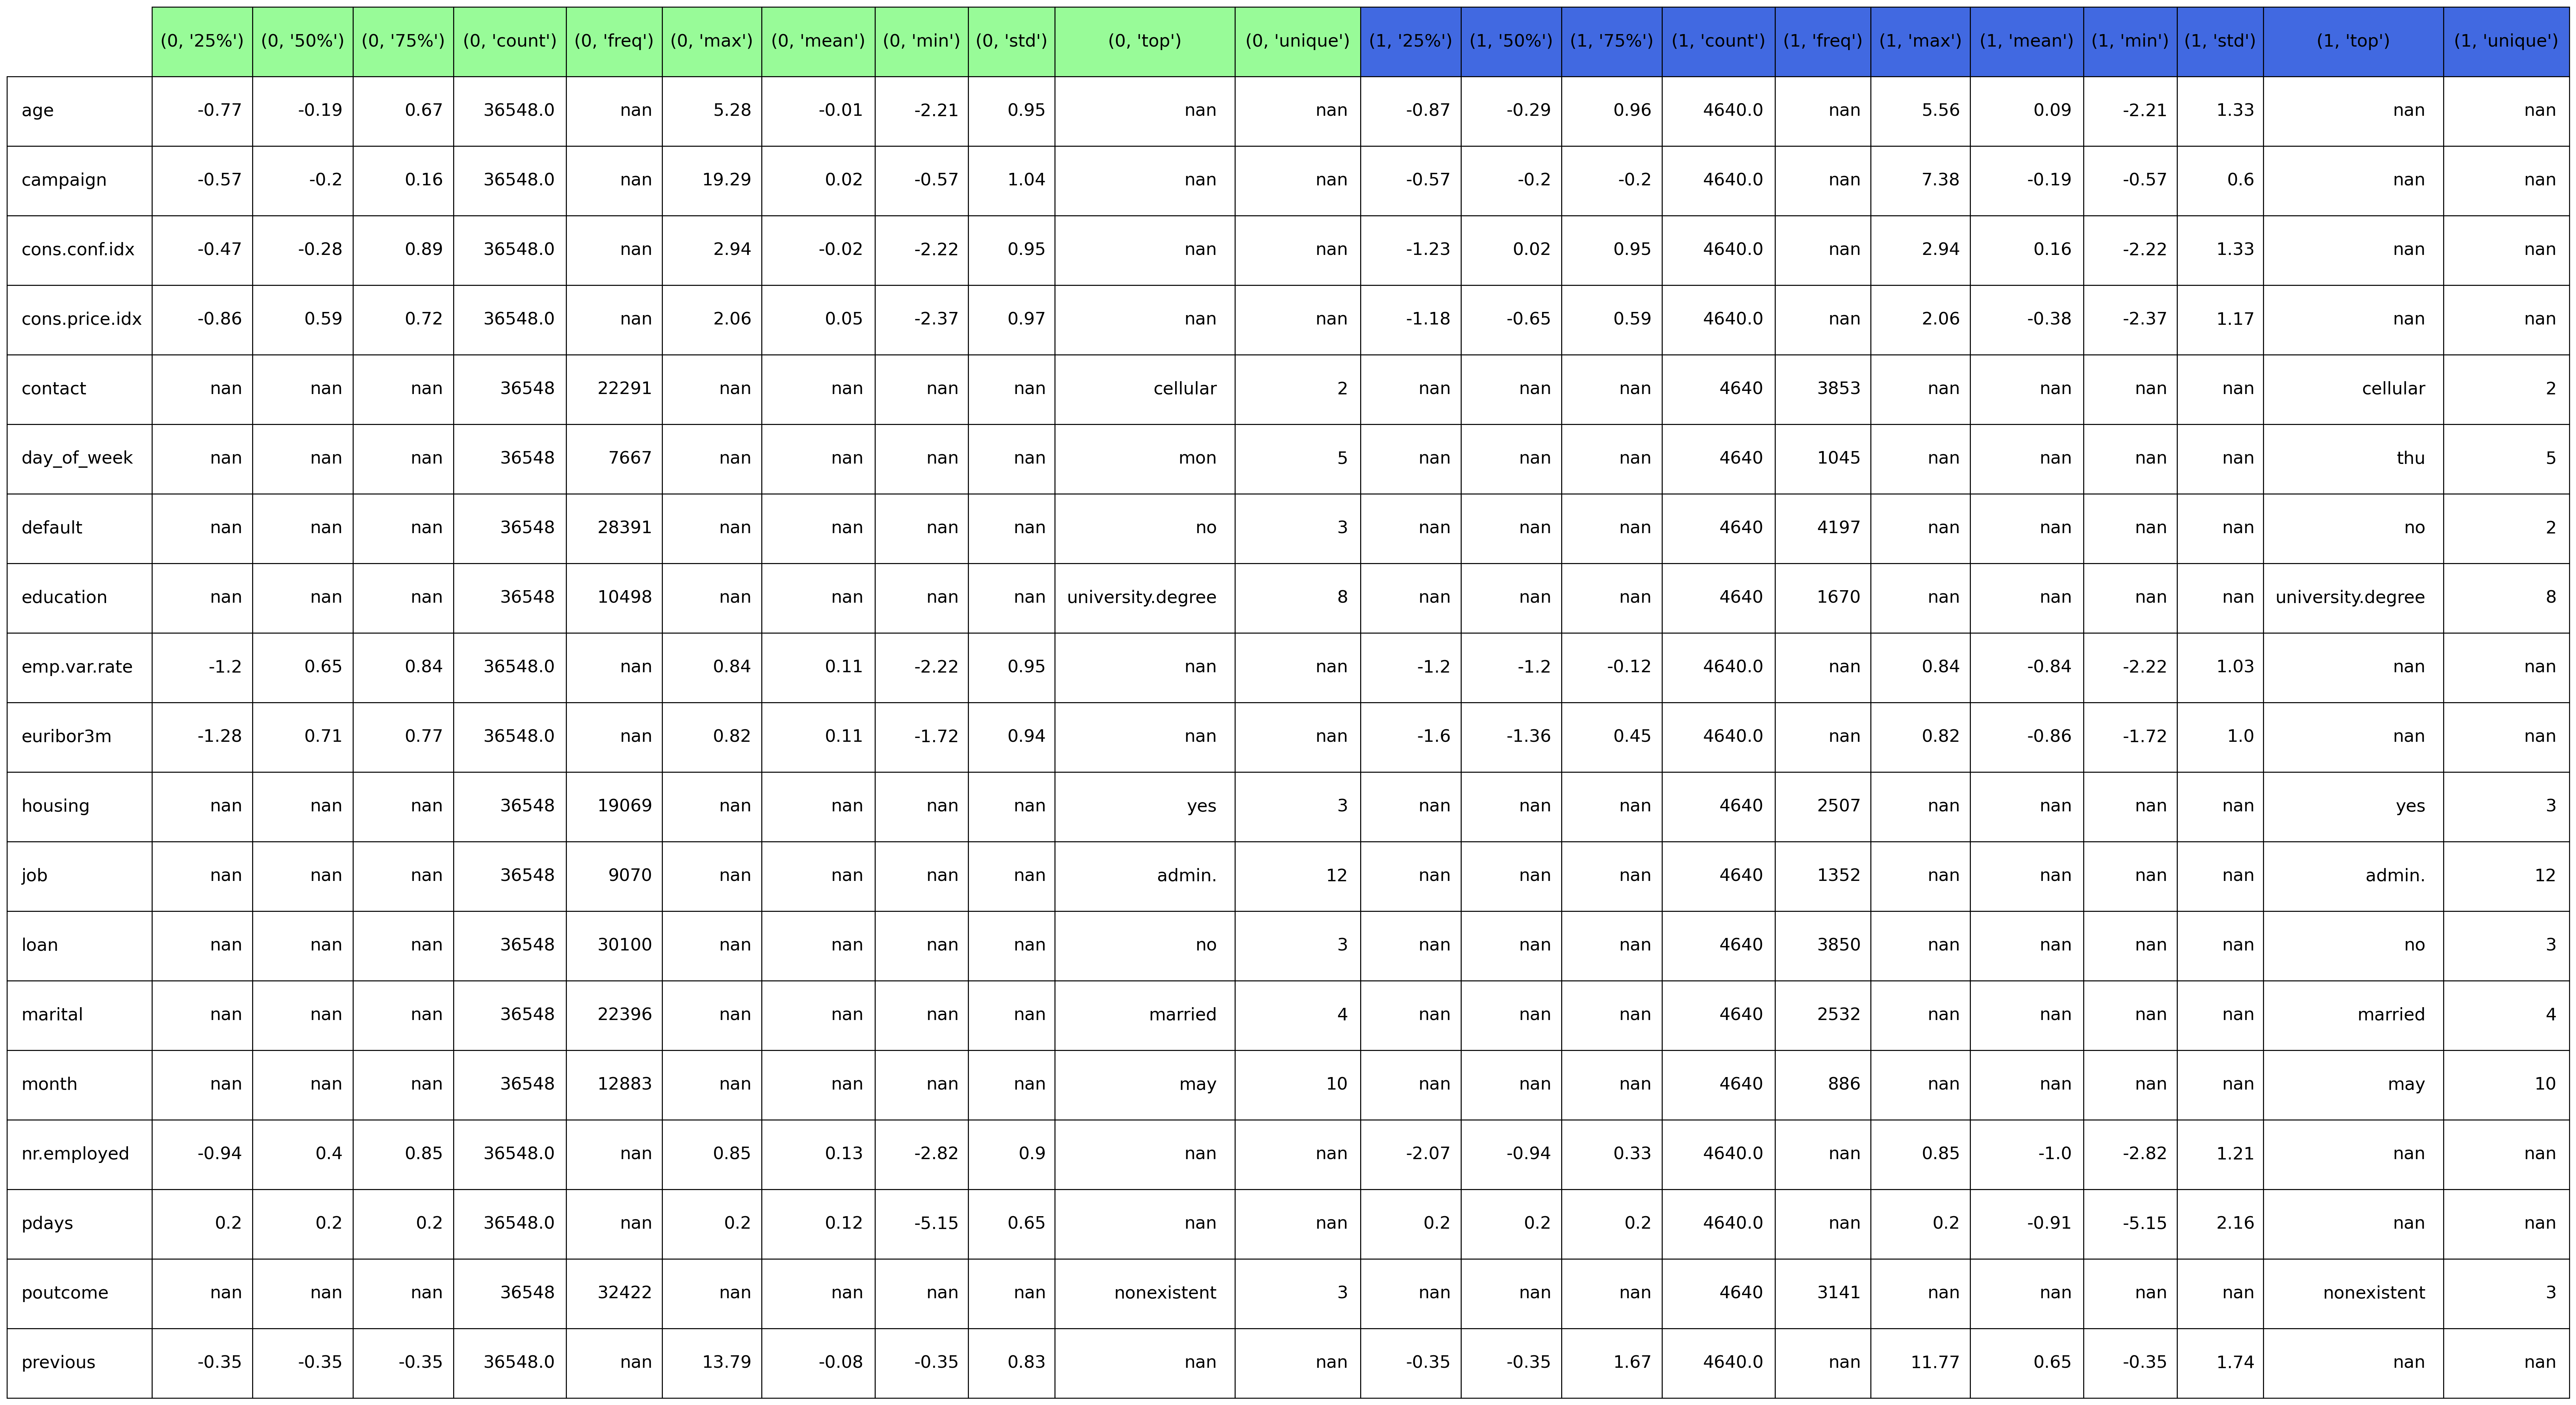

In [ ]:
# Statistical Summary
from pandas.plotting import table

df2 = df.describe()
nrows, ncols = len(df2)+1, len(df2.columns)
hcell, wcell = 0.3, 0.1 # tweak as per your requirements
hpad, wpad = 0.5, 0.5    


fig, ax = plt.subplots(figsize=(8, 14), frameon=False, dpi=200)#figsize=(ncols*wcell+wpad, nrows*hcell+hpad))
table = ax.table(cellText=df_desc_stats_final.values, colWidths = [0.25]*len(df_desc_stats_final.columns),
          rowLabels=df_desc_stats_final.index,
          colLabels=df_desc_stats_final.columns,
          colColours=colClass,
          loc='center')

table.auto_set_font_size(False)
table.set_fontsize(18)
table.scale(10,6)

table.auto_set_column_width(col=list(range(len(df_desc_stats_final.columns))))

ax.axis('off')
ax.axis('tight')
plt.show()

# Workaround
fig.canvas.draw()
#save the plot as a png file
#fig.savefig('descriptive_statistics_plot.png', bbox_inches='tight')

Now we can call the functions and have the resultant transformed sets

## Encode training and test sets

In [14]:
# Transform input data (X)
train_df_trans, test_df_trans = transform_input(X_train_raw, X_test_raw, quant_var, nom_var, onehot_var, df)

# Transform output data (y)
y_train_trans, y_test_trans = transform_target(y_train, y_test)

# Prepare inputs
X_train = np.array(train_df_trans)
X_test = np.array(test_df_trans)

# Reshape target variable
y_train = y_train_trans.reshape(-1,1)
y_test = y_test_trans.reshape(-1,1)

Now we verify the dimensions of encoded arrays

In [15]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(32950, 40) (8238, 40)
(32950, 1) (8238, 1)


# 4. Model Implementation

## 4.1. MLP Implementation

#### Define initial parameters

In [ ]:
# max_epochs = 100
# learning_rate = 0.003
# input_dim = 50
# hidden_dim = 50
# output_dim = 2

# # Dataloader Parameters
# params_train = {'batch_size': 64,
#           'shuffle': True,
#           'num_workers': 6}

# params_test = {'batch_size': 1024,
#           'shuffle': False,
#           'num_workers': 6}


In [ ]:
# def smote_train_val_loader(x_train, y_train, batch_size_train=64, batch_size_val=64):
    
#     # Shuffle the indices
#     indices = np.arange(0,len(x_train)) # build an array
#     np.random.shuffle(indices) # shuffle the indicies
    
#     X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)
    
#     # Define SMOTE instance
#     smt = SMOTE(sampling_strategy='minority', random_state=2)

#     # Apply SMOTE to training only
#     X_train_smote, y_train_smote = smt.fit_resample(X_train,#[indices[:round(len(X_train)*0.8)]], 
#                                                     y_train) #[indices[:round(len(y_train)*0.8)]])
   
#     # Create X_val and y_val according to the shuffled indexes (Validate on 10% of the imbalanced data)
#     #X_val = X_train[indices[-(len(X_train)-round(len(X_train)*0.8)):]]
#     #y_val = y_train[indices[-(len(y_train)-round(len(y_train)*0.8)):]]
                      
                      
#     # Train set
#     # Create feature and targets tensor for training set
#     featuresTrain = torch.from_numpy(X_train_smote).type(torch.FloatTensor)
#     targetsTrain = torch.from_numpy(y_train_smote).type(torch.FloatTensor) 
    
#     # Val set
#     # Create feature and targets tensor for validate set
#     featuresVal = torch.from_numpy(X_val).type(torch.FloatTensor)
#     targetsVal = torch.from_numpy(y_val).type(torch.FloatTensor) 
    
#     # Tensor Datasets
#     train_data = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
#     val_data = torch.utils.data.TensorDataset(featuresVal,targetsVal)
    
#     # Dataloader Generators
#     train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size_train,shuffle = True,
#                                                num_workers= 0)
    
#     val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size_val,shuffle = True,
#                                              num_workers= 0) 

#     return train_loader, val_loader

In [ ]:
# def test_data_loader(x_test, y_test):
    
#     # Test set
#     # create feature and targets tensor for validate sets. We need variable to accumulate gradients.    
#     featuresTest = torch.from_numpy(x_test).type(torch.FloatTensor)
#     targetsTest = torch.from_numpy(y_test).type(torch.FloatTensor) # data type is long
    
#     # Tensor Dataset
#     test_data = torch.utils.data.TensorDataset(featuresTest,targetsTest)
    
#     # Dataloader Generators
#     #training_set = Dataset(X_sm, y_sm)
#     test_loader = torch.utils.data.DataLoader(test_data, batch_size= 128,shuffle = False, num_workers= 0)
    
#     return test_loader

## 4.1.1. Network architecture

## Define network architecture and create instance

### Define Neural Network architecture

In [5]:
class NeuralNet(nn.Module):
    def __init__(self, input_dim=40, hidden_dim=48, output_dim=2, dropout=0.5):
        super(NeuralNet, self).__init__()
#         self.classifier = nn.Sequential(
#             # 1st hidden layer
#             nn.Linear(input_dim, hidden_dim),
#             nn.BatchNorm1d(hidden_dim), #applying batch norm
#             nn.ReLU(),
#             # 2nd hidden layer
#             nn.Linear(hidden_dim, round(hidden_dim/2)),
#             nn.BatchNorm1d(round(hidden_dim/2)),
#             nn.ReLU(),
#             nn.Linear(round(hidden_dim/2), output_dim),
#             nn.Sigmoid()
#         )
        
        self.hidden_dim = hidden_dim
        self.fcl1 = nn.Linear(input_dim, hidden_dim)
        self.fcl2 = nn.Linear(hidden_dim, round(hidden_dim/2))
        #self.fcl3 = nn.Linear(hidden_dim, hidden_dim)
        #self.fcl4 = nn.Linear(hidden_dim, hidden_dim)
        self.output = nn.Linear(round(hidden_dim/2), output_dim)
        
        self.batchnorm1 = nn.BatchNorm1d(hidden_dim) # Batch Normalization (First Layer)
        self.batchnorm2 = nn.BatchNorm1d(round(hidden_dim/2)) # Batch Normalization (Second Layer)
        #self.batchnorm3 = nn.BatchNorm1d(hidden_dim) # Batch Normalization (Third Layer)
        #self.batchnorm4 = nn.BatchNorm1d(hidden_dim) # Batch Normalization (Fourth Layer)
        self.dropout = nn.Dropout(p=dropout) # Dropout
    
        # Initialize weights with Uniform distribution (First Layer)
        nn.init.uniform_(self.fcl1.weight)
        # Initialize bias with zeros (First Layer)
        nn.init.zeros_(self.fcl1.bias)
        # Initialize weights with Uniform distribution (Second Layer)
        nn.init.uniform_(self.fcl2.weight)
        # Initialize bias with zeros (Second Layer)
        nn.init.zeros_(self.fcl2.bias)
        
        # Initialize weights with Uniform distribution (Third Layer)
        #nn.init.uniform_(self.fcl3.weight)
        # Initialize bias with zeros (Third Layer)
        #nn.init.zeros_(self.fcl3.bias)
        # Initialize weights with Uniform distribution (Fourth Layer)
        #nn.init.uniform_(self.fcl4.weight)
        # Initialize bias with zeros (Fourth Layer)
        #nn.init.zeros_(self.fcl4.bias)
        
    def forward(self, x):

        x = self.dropout(F.elu(self.batchnorm1(self.fcl1(x)))) # First Hidden Layer 
        x = self.dropout(F.elu(self.batchnorm2(self.fcl2(x)))) # Second Hidden Layer
        #x = self.dropout(F.elu(self.batchnorm3(self.fcl3(x)))) # Third Hidden Layer
        #x = self.dropout(F.elu(self.batchnorm4(self.fcl4(x)))) # Fourth Hidden Layer
        x = self.output(x)          
        return x 


## Visualize the Neural Network architecture

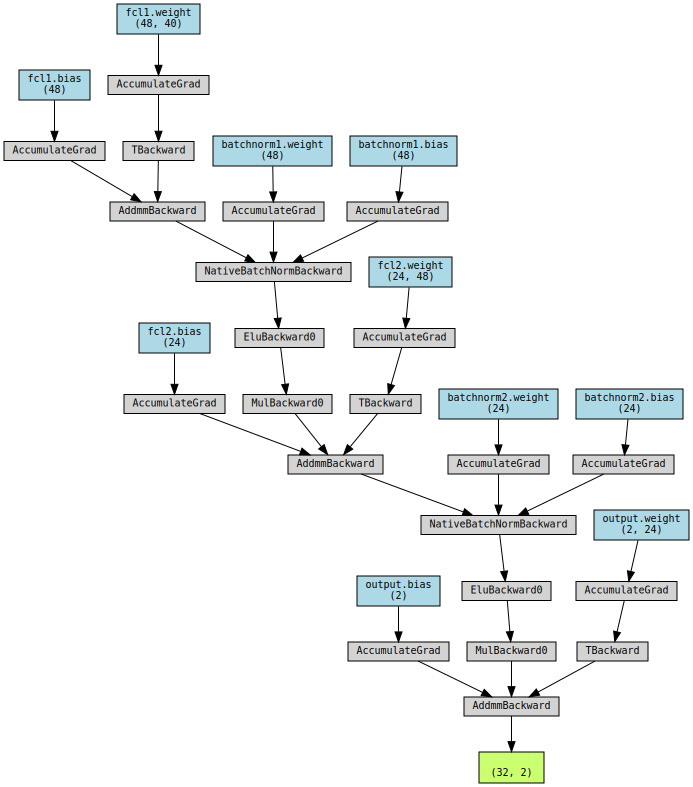

In [ ]:


model = NeuralNet()
# Tensor Datasets
featuresTrain = torch.from_numpy(X_train.astype(np.float32)).type(torch.FloatTensor)
targetsTrain = torch.from_numpy(y_train.astype(np.int64).squeeze(1)).type(torch.FloatTensor)  
# Tensor Datasets
train_data = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
# Dataloader Generators
train_loader = torch.utils.data.DataLoader(train_data, batch_size= 32,shuffle = True,num_workers= 0)

batch = next(iter(train_loader))
y_dummy = model(batch[0]) #Dummy batch
make_dot(y_dummy, params=dict(list(model.named_parameters())))

### Network initial parameters

In [ ]:
network = NeuralNet()
for name, param in network.named_parameters():
    if param.requires_grad:
        print(name, param.data)

fcl1.weight tensor([[0.9475, 0.1563, 0.4869,  ..., 0.7679, 0.7637, 0.2424],
        [0.4891, 0.8553, 0.5755,  ..., 0.8138, 0.1891, 0.2430],
        [0.2277, 0.1090, 0.0480,  ..., 0.3774, 0.0670, 0.3274],
        ...,
        [0.8521, 0.9357, 0.0014,  ..., 0.0505, 0.9562, 0.3413],
        [0.4872, 0.5581, 0.2291,  ..., 0.0362, 0.8850, 0.5742],
        [0.4028, 0.3190, 0.8566,  ..., 0.5292, 0.7557, 0.6127]])
fcl1.bias tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
fcl2.weight tensor([[0.5044, 0.4224, 0.4360,  ..., 0.4902, 0.5276, 0.2539],
        [0.3519, 0.5062, 0.0737,  ..., 0.9800, 0.7191, 0.3877],
        [0.6108, 0.1621, 0.7972,  ..., 0.8015, 0.0025, 0.2232],
        ...,
        [0.6278, 0.4434, 0.8417,  ..., 0.7140, 0.1842, 0.1197],
        [0.5449, 0.9856, 0.8773,  ..., 0.3798, 0.5957, 0.6340],
        [0.3335, 0.4141, 0

## 4.1.2. Scorch Classifier

Now we feed our model to the skorch classifier and define a skorch object with initial parameters before optimization.

In [ ]:
# Define class weights (If necessary)
#weights = [1.0, 3.0]
#class_weights = torch.FloatTensor(weights)

In [ ]:
# Define checkpoints for training and validation loss
#monitor_loss = lambda nnet: all(nnet.history[-1, ('train_loss_best', 'valid_loss_best')])

# Define checkpoints for training and validation acc
#monitor_acc = lambda nnet: nnet.history[-1, ('valid_acc',)]

# Define epoch scoring functions
rocauc = EpochScoring(scoring='roc_auc', lower_is_better=False)
tr_acc = EpochScoring(scoring='accuracy', name='train_acc', on_train=True, lower_is_better=False)

#nnet = NeuralNetBinaryClassifier(
nnet = NeuralNetClassifier(
            module=NeuralNet,
            max_epochs=350,
            batch_size=32,
            #criterion=torch.nn.BCEWithLogitsLoss,
            #criterion=torch.nn.BCELoss,        
            criterion=nn.CrossEntropyLoss,
            #criterion__reduction='mean',
            lr=0.0001,
            callbacks=[EarlyStopping(patience=10), tr_acc, rocauc], #, Checkpoint(monitor=monitor_loss)],  
            # Shuffle training data on each epoch
            iterator_train__shuffle=True,
            #optimizer__momentum=0.9,
            optimizer=torch.optim.Adam,
            device=device
        )

# deactivate skorch-internal train-valid split and verbose logging
#nnet.set_params(train_split=False, verbose=0)

# # CrossEntropyLoss
# nnet.fit(X_train_net.astype(np.float32), y_train_net.astype(np.int64).squeeze(1))
# y_proba = nnet.predict_proba(X_train_net.astype(np.float32))

# BCEWithLogitsLoss
# nnet.fit(X_train_net.astype(np.float32), y_train_net.astype(np.float32).squeeze(1))
# y_proba = nnet.predict_proba(X_train_net.astype(np.float32))


## First we should define a best set of weights to balance the classes (using GridsearchCV)

### Define initial training function for the MLP NN architecture (The function returns the best model)

Counter({0: 29238, 1: 3712})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Counter({0: 14619, 1: 14619})


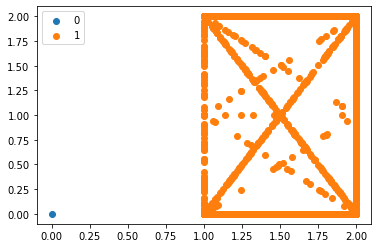

In [ ]:
# Undersample and plot imbalanced dataset with One-Sided Selection
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import OneSidedSelection
from matplotlib import pyplot
from numpy import where
from imblearn.under_sampling import EditedNearestNeighbours 

# summarize class distribution
counter = Counter(y_train[:,0])
print(counter)
# define the undersampling method
over = SMOTE(sampling_strategy=0.5, random_state=2 ,k_neighbors=7)
#under = EditedNearestNeighbours(sampling_strategy='majority', n_neighbors=7)
randunder = RandomUnderSampler(sampling_strategy='majority', random_state=2)
# transform the dataset
X_new, y_new = over.fit_resample(X_train, y_train)
#X_new, y_new = under.fit_resample(X_new, y_new)
X_new, y_new = randunder.fit_resample(X_new, y_new)
# summarize the new class distribution
counter = Counter(y_new)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y_new == label)[0]
    pyplot.scatter(X_new[row_ix, 0], X_new[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()
#Counter({0: 13649, 1: 3712})

In [ ]:
def train_mlp_model_selection(X_train_model,y_train_model,n_iter=10):
    
    
    scaler = preprocessing.StandardScaler()

    # Define resampling technique
    #smote_only = SMOTE(random_state=2)  #sampling_strategy='minority'
    #under = EditedNearestNeighbours(sampling_strategy='majority', n_neighbors=7)
    over = SMOTE(sampling_strategy=0.2, random_state=2 ,k_neighbors=7)
    rand_under = RandomUnderSampler(sampling_strategy='majority', random_state=2)

    # Create a Imbalance Pipeline with Over Sampling and Under Sampling
    nnet_pipeline = imbPipeline([('scaler',scaler), 
                                #('smoteonly', smote_only), 
                                 ('o', over), #('u', under),
                                 ('ru', rand_under),
                                 ('nnet', nnet)])

    
    # Deactivate parameter grid used for GridSearchCV
    # params_gridcv = {
    #     'nnet__lr': [0.0003, 0.00001], #, 0.00003, 0.0001, 0.0003, 0.001, 0.01], 
    #     'nnet__max_epochs': [150], #, 20, 30
    #     'nnet__module__dropout': [0.5], #[0.4, 0.5, 0.6], 
    #     'nnet__module__hidden_dim': [48], #48, 96, 128],
    #     #'nnet__optimizer__momentum':[0.5, 0.9],
    #     #'optimizer': [optim.SGD] #, optim.RMSprop
    #     'nnet__optimizer__weight_decay':[1e-1, 1e-2]
    # } 
    #gs = GridSearchCV(smp_pipeline, params, refit=False, cv=skf, scoring='average_precision',verbose=2)
    #gs.fit(X_test_net.astype(np.float32), y_test_net.astype(np.int64).squeeze(1))
    
    #nnet.fit(X_train_model.astype(np.float32), y_train_model.astype(np.int64).squeeze(1))
    #y_proba = nnet.predict_proba(X_train_model.astype(np.float32))
    
    params_randcv ={
          'nnet__batch_size': [32],  
          'nnet__module__hidden_dim':randint(20,80),
          'nnet__module__dropout': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], #uniform(0, 1),
          'nnet__lr': loguniform(1e-5, 1e-1),
          'nnet__optimizer__weight_decay': loguniform(1e-6, 1e-1),  
          'nnet__optimizer': [AdaBound, optim.Adam], #, optim.RMSprop, optim.Adagrad, optim.Adadelta, optim.SGD, optim.Adamax],
          'nnet__max_epochs': randint(50,350)
        }


    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)


    scorersMLP = {
      'precision_score': make_scorer(precision_score, zero_division=1),
      'recall_score': make_scorer(recall_score, zero_division=1),
      'accuracy_score': make_scorer(accuracy_score),
      'roc_auc_score': make_scorer(roc_auc_score),
      'average_precision_score': make_scorer(average_precision_score),
      'f1_score': make_scorer(f1_score)
    }
    
    nnet_pipeline.fit(X_train_model.astype(np.float32), y_train_model.astype(np.int64).squeeze(1))
    #y_proba = nnet_pipeline.predict_proba(X_train_model.astype(np.float32))
    
    
    mlp_rs = RandomizedSearchCV(nnet_pipeline, params_randcv, refit='roc_auc_score', 
                            cv=skf, scoring=scorersMLP, return_train_score = True,
                            n_iter=n_iter, random_state=123, verbose=10, n_jobs=-1) #, verbose=100)

    start = time.time()
    mlp_model_selection = mlp_rs.fit(X_train_model.astype(np.float32), y_train_model.astype(np.int64).squeeze(1))

    totaltime = time.time() - start
    print("RandomizedSearchCV (MLP) took %.2f seconds (%.2f hours) for %d selected candidates"
          " parameter settings." % ((totaltime), (totaltime/3600), n_iter))

    print("Best params: {}".format(mlp_model_selection.best_params_))
    print("Best scores: {}".format(mlp_model_selection.best_score_))

    return mlp_model_selection, nnet

## Execute Random search cross-validation to select the best hyperparameters using 64 iterations in the search

In [ ]:
mlp_model_selection, nnet_selection = train_mlp_model_selection(X_train,y_train,n_iter = 64)

Re-initializing module.
Re-initializing optimizer.
  epoch    roc_auc    train_acc    train_loss    valid_acc    valid_loss     dur
-------  ---------  -----------  ------------  -----------  ------------  ------
      1     0.6620       0.5798        0.7070       0.6434        0.6636  0.8425
      2     0.6688       0.6027        0.6937       0.6520        0.6558  0.7819
      3     0.6748       0.6149        0.6886       0.6610        0.6526  0.8051
      4     0.6796       0.6356        0.6721       0.6648        0.6487  0.7800
      5     0.6845       0.6434        0.6666       0.6691        0.6448  0.7674
      6     0.6889       0.6448        0.6672       0.6691        0.6406  0.8181
      7     0.6919       0.6526        0.6573       0.6794        0.6399  0.7951
      8     0.6960       0.6627        0.6547       0.6764        0.6355  0.8044
      9     0.6981       0.6662        0.6492       0.6729        0.6344  0.8410
     10     0.7010       0.6719        0.6428       0.6802

In [ ]:
mlp_model_selection_2 = mlp_model_selection

Save model selection estimator to the disk

In [ ]:
dump(mlp_model_selection, 'mlp_model_selection.joblib') 

['mlp_model_selection.joblib']

In [ ]:
# Save best model trained on entire training set
nnet.save_params(f_params='mlp_model_selection.pkl', f_optimizer='mlp_model_selection_opt.pkl', 
                           f_history='mlp_model_selection_history.json')

In [ ]:
#y_proba = mlp_best_model.predict_proba(X_train.astype(np.float32))

## Plot Training and Validation history

## Accuracies per hyperparameter settings iteration

In [ ]:
mlp_best_model.cv_results_

{'mean_fit_time': array([ 40.20006232, 126.9082253 ,  90.4696847 ,  92.59804678,
         33.03423095,  37.45918126,  68.84802742, 427.96842856,
         32.97734056, 211.92919326, 364.7022759 ,  29.1058476 ,
         34.82939792, 107.77825089, 223.86518731, 108.53101988,
         29.8953897 ,  71.48975186, 270.76789136,  86.97907391,
        227.43093672,  30.61117463, 143.24132252,  31.72202902,
        123.62872438,  78.9103498 , 165.70403337,  65.76558399,
        107.79964752,  31.60006776, 171.44596238,  31.26067028,
         59.70401416,  27.13257914, 170.68083549,  89.7373909 ,
         81.08183303, 124.37984114, 110.59441633,  41.16142364,
         45.66267314,  41.51212716,  60.22580981, 118.28041553,
         24.73878994,  20.16117187,  57.71147466, 106.2187593 ,
         96.79929786, 205.8484334 ,  91.43404021,  30.22234559,
        135.28341813, 142.78744173, 213.9453073 ,  23.21465764,
         87.2141459 ,  34.36895413, 182.14707999, 270.19072375,
        111.42497444, 1

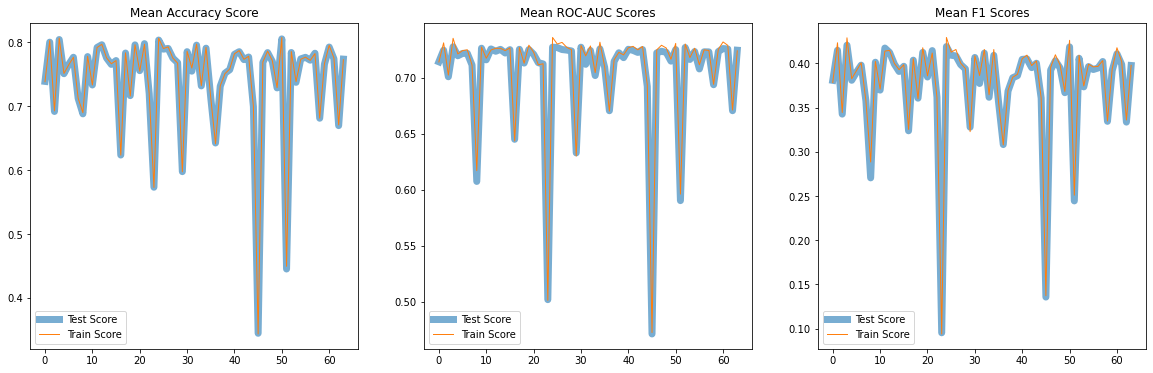

In [ ]:
val_acc_scores = mlp_best_model.cv_results_['mean_test_accuracy_score']
train_acc_scores = mlp_best_model.cv_results_['mean_train_accuracy_score'] 

val_roc_auc_scores = mlp_best_model.cv_results_['mean_test_roc_auc_score']
train_roc_auc_scores = mlp_best_model.cv_results_['mean_train_roc_auc_score'] 

val_f1_scores = mlp_best_model.cv_results_['mean_test_f1_score']
train_f1_scores = mlp_best_model.cv_results_['mean_train_f1_score'] 

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,6))
ax[0].plot(val_acc_scores, label='Test Score',linewidth=7, alpha=0.6)
ax[0].plot(train_acc_scores, label='Train Score',linewidth=1)
ax[0].legend(loc='best')
ax[0].set_title('Mean Accuracy Score')

ax[1].plot(val_roc_auc_scores, label='Test Score',linewidth=7, alpha=0.6)
ax[1].plot(train_roc_auc_scores, label='Train Score',linewidth=1)
ax[1].legend(loc='best')
ax[1].set_title('Mean ROC-AUC Scores')

ax[2].plot(val_f1_scores, label='Test Score',linewidth=7, alpha=0.6)
ax[2].plot(train_f1_scores, label='Train Score',linewidth=1)
ax[2].legend(loc='best')
ax[2].set_title('Mean F1 Scores')

plt.show()

### Plot Training vs Validation Learning Curves (Accuracy / Loss)

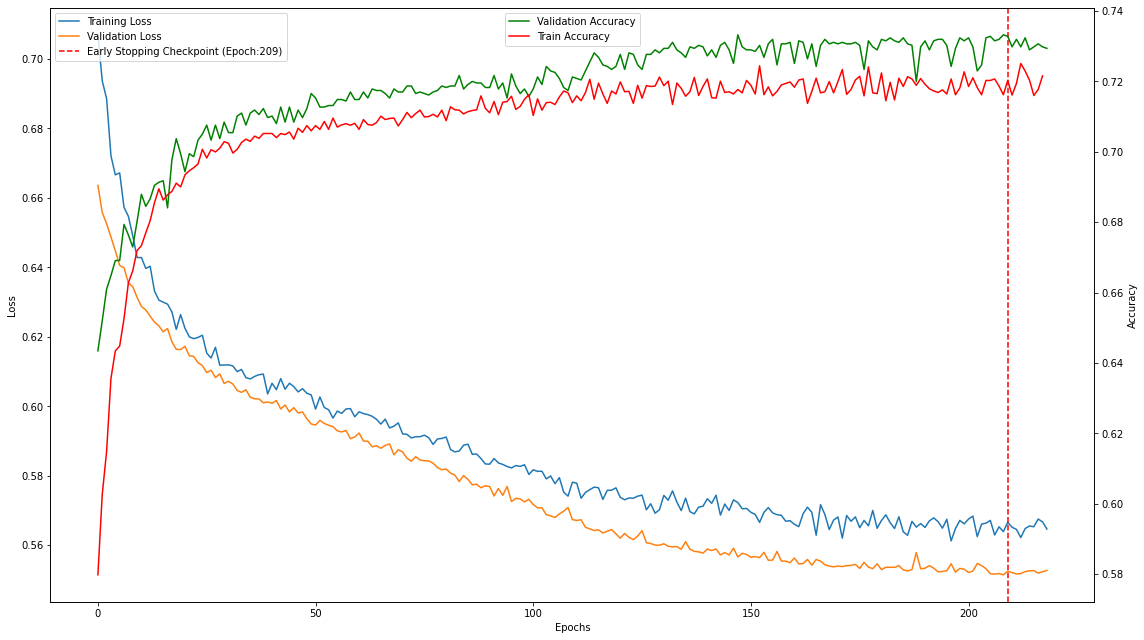

In [ ]:
def mlp_learning_curve(model):
    net = model
    
    loss = [net.history[:,'train_loss'][i] for i in range(len(net.history[:,'train_loss']))]
    valid_loss = [net.history[:,'valid_loss'][i] for i in range(len(net.history[:,'valid_loss']))]
    val_acc = [net.history[:,'valid_acc'][i] for i in range(len(net.history[:,'valid_acc']))]
    train_acc = [net.history[:,'train_acc'][i] for i in range(len(net.history[:,'train_acc']))]
    plt.figure(figsize=(16,9))
    plt.plot(loss, label='Training Loss')
    lines = plt.plot(valid_loss, label="Validation Loss")
    
    # Find position of lowest validation loss (Early Stopping)
    minposs = valid_loss.index(min(valid_loss))+1 
    plt.axvline(minposs, linestyle='--', color='r',label='Early Stopping Checkpoint (Epoch:' + str(minposs) + ')')

    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend(loc='upper left')
    ax2 = plt.gca().twinx()
    ax2.plot(val_acc, label='Validation Accuracy', color='g')
    ax2.plot(train_acc, label='Train Accuracy', color='r')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper center')
    plt.tight_layout()
    
mlp_learning_curve(nnet_selection)

#### Save results from the RandomizerSearch into a dataframe for analysis

### Save Randomizer Search results into a dataframe for plotting the Parallel Plot

In [ ]:
df_RandomSearchResults_mlp = pd.concat([pd.DataFrame(mlp_model_selection.cv_results_["params"]),
    pd.DataFrame(mlp_model_selection.cv_results_['mean_test_accuracy_score'], columns=['Accuracy']),
    pd.DataFrame(mlp_model_selection.cv_results_['mean_test_roc_auc_score'],columns=['ROC_AUC']),
    pd.DataFrame(mlp_model_selection.cv_results_['mean_test_average_precision_score'], columns=['PR_AUC'])],axis=1)

df_RandomSearchResults_mlp.sort_values(by=['ROC_AUC'],ascending=False)

,nnet__batch_size,nnet__lr,nnet__max_epochs,nnet__module__dropout,nnet__module__hidden_dim,nnet__optimizer,nnet__optimizer__weight_decay,Accuracy,ROC_AUC,PR_AUC
25,32,0.020723,53,0.1,44,<class '__main__.AdaBound'>,0.000800,0.794962,0.729234,0.237395
41,32,0.000745,177,0.4,63,<class 'torch.optim.adam.Adam'>,0.000668,0.794780,0.728076,0.236282
24,32,0.000346,301,0.1,75,<class 'torch.optim.adam.Adam'>,0.000007,0.800637,0.727963,0.238812
26,32,0.000173,180,0.2,66,<class 'torch.optim.adam.Adam'>,0.000011,0.785918,0.727898,0.232635
55,32,0.015692,288,0.0,38,<class 'torch.optim.adam.Adam'>,0.001051,0.788862,0.727444,0.233665
...,...,...,...,...,...,...,...,...,...,...
13,32,0.000118,153,0.9,54,<class 'torch.optim.adam.Adam'>,0.015320,0.748255,0.703154,0.210409
45,32,0.096460,121,0.7,43,<class 'torch.optim.adam.Adam'>,0.000033,0.722367,0.695615,0.219455
58,32,0.000019,127,0.8,44,<class 'torch.optim.adam.Adam'>,0.000012,0.656571,0.684652,0.180528
36,32,0.000016,57,0.6,55,<class 'torch.optim.adam.Adam'>,0.000819,0.645645,0.668851,0.171901



Save hyperparameter results to CSV file (Top 20)



In [ ]:
# Rename columns to a more explainable name
df_RandomSearchResults_mlp.rename({'nnet__lr': 'Learning_Rate', 'nnet__module__dropout': 'Dropout', 
          'nnet__module__hidden_dim': 'Hidden_Nodes', 'nnet__optimizer__weight_decay': 'Weight_Decay',
          'nnet__optimizer': 'Optimizer', 'nnet__max_epochs': 'Max Epochs'}, 
          axis=1, inplace=True)

df_RandomSearchResults_mlp.sort_values(by=['ROC_AUC'],ascending=False).head(20).to_csv('mpl_random_search_hyperparameters.csv')

### Plot hyperparameter search results

### Using ROC

In [ ]:
cols = ['Learning_Rate', 'Weight_Decay', 'Dropout', 'Hidden_Nodes', 'Max Epochs', 'ROC_AUC']

fig = px.parallel_coordinates(df_RandomSearchResults_mlp, color='ROC_AUC', dimensions=cols, 
                              color_continuous_scale=px.colors.sequential.Viridis,
                              title="MLP Hyperparameter Search Plot (ROC_AUC)",
                              width=1000, height=700)

fig.show()

### Using accuracy

In [ ]:
# Rename columns to a more explainable name
df_RandomSearchResults_mlp.rename({'nnet__lr': 'Learning_Rate', 'nnet__module__dropout': 'Dropout', 
          'nnet__module__hidden_dim': 'Hidden_Nodes', 'nnet__optimizer__weight_decay': 'Weight_Decay',
          'nnet__max_epochs': 'Max Epochs'}, 
          axis=1, inplace=True)

cols = ['Learning_Rate', 'Weight_Decay', 'Dropout', 'Hidden_Nodes', 'Max Epochs', 'Accuracy']

fig = px.parallel_coordinates(df_RandomSearchResults_mlp, color='Accuracy', dimensions=cols, 
                              color_continuous_scale=px.colors.sequential.Viridis,
                              title="MLP Hyperparameter Search Plot (Accuracy)",
                              width=1000, height=700)

fig.show()

Plot table of the hyperparameters and metrics of roc_auc, pr_auc and accuracy.

In [ ]:
y_train_preds = mlp_model_selection.predict(X_train.astype(np.float32))

### Analyse Prediction Results and compute metrics

Now we want to analyse how the model can be compared against the training data:

- True Positives: Total number of correct predictions of a client subscription.

- False Positives: The model predicted a subscription but the client did not subscribe.

- True Negatives: Total number of correct predictions of clients not subscribed.

- False Negative: The model predicted a non subscription but the client is subscribed.


- Precision: TP / (TP+FP)
It can be defined as the number of positive predictions (subscriptions) over the total number of predictions.
 

- Recall: TN / (TP+FN)

From the above definitions we can clearly state that  False Positives can generate less benefits compared to False Negatives. Therefore it is more important to have less False Positives than the opposite.


F1-Score:
Support: Each class has a support number to represent the amount of examples for the class.


In [ ]:

#gs.fit(X_test_net.astype(np.float32), y_test_net.astype(np.float32).squeeze(1))
y_train_preds = mlp_model_selection.predict(X_train.astype(np.float32))
actual_label = y_train.astype(np.float32).squeeze(1)

f1 = f1_score(actual_label, y_train_preds)
#fbeta_score = fbeta_score(actual_label, y_train_preds, average='weighted', beta=0.5)
accuracy = accuracy_score(actual_label, y_train_preds)
roc_auc = roc_auc_score(actual_label, y_train_preds)
cm = confusion_matrix(actual_label, y_train_preds)
report = classification_report(actual_label, y_train_preds)

print("Model ROC-AUC(Train Data): ", roc_auc)
print("Model F1-Score (Train Data): ", f1)
#print("Model FBeta-Score (Train Data): ", fbeta_score)
print("Model Accuracy: ", accuracy)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", report)

Model ROC-AUC(Train Data):  0.7315446961293876
Model F1-Score (Train Data):  0.4134590874330869
Model Accuracy:  0.7905007587253414
Confusion Matrix:
 [[23614  5624]
 [ 1279  2433]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.81      0.87     29238
         1.0       0.30      0.66      0.41      3712

    accuracy                           0.79     32950
   macro avg       0.63      0.73      0.64     32950
weighted avg       0.88      0.79      0.82     32950



### ROC-AUC Curve

In [ ]:
# keep probabilities for the positive outcome only
yhat_mlp = mlp_model_selection.predict(X_train.astype(np.float32))
yhat_mlp = yhat_mlp[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat_mlp)

In [ ]:
plot_roc_auc_thresholds(fpr, tpr, thresholds, y_train, yhat_mlp, plot_type='MLP')

Best Threshold=0.592243, G-Mean=0.728


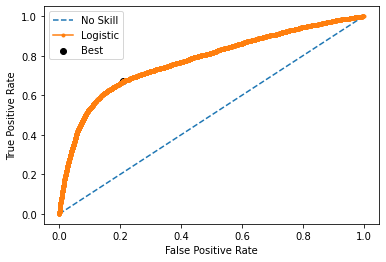

In [ ]:



# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

### Precision-Recall Curve (PR-AUC)

In [ ]:
# Data to plot precision - recall curve
precision, recall, thresholds = precision_recall_curve(y_train, y_train_preds)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall = auc(recall, precision)
print('PR-AUC:',auc_precision_recall)

PR-AUC: 0.4981158190287896


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.39')

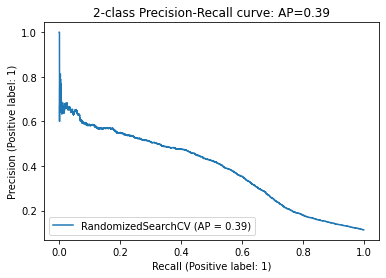

In [ ]:
average_precision = average_precision_score(y_train.astype(np.float32), yhat_mlp)

disp = plot_precision_recall_curve(mlp_best_model, X_train.astype(np.float32), y_train.astype(np.float32))
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

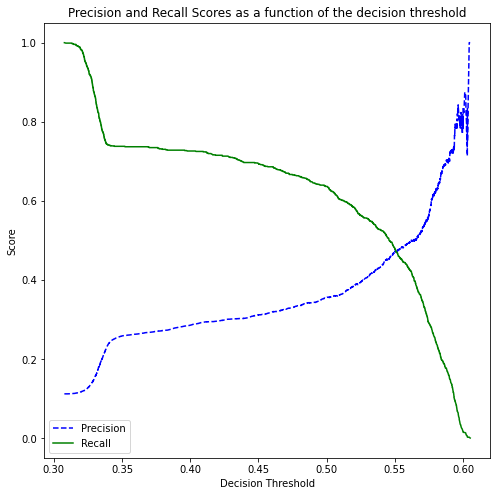

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')
    
plot_precision_recall_vs_threshold(precision, recall, thresholds)

### Precision-Recall Area Under Curve (AUC) Score

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


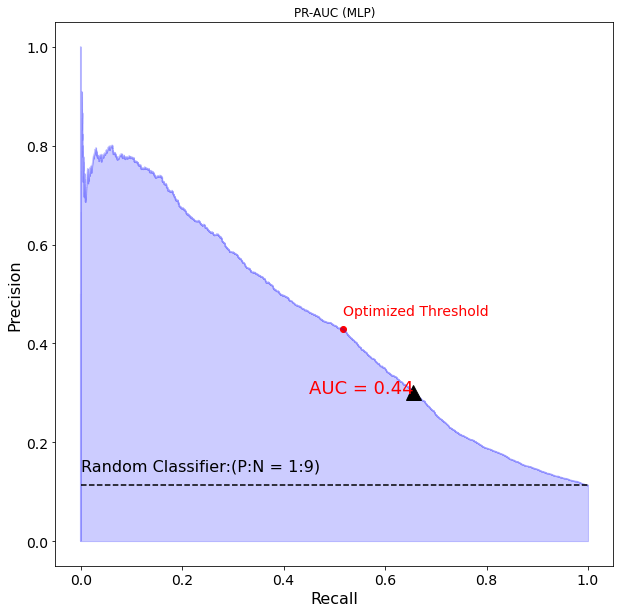

In [ ]:
y_pred_proba_mlp = mlp_model_selection.predict_proba(X_train.astype(np.float32))[:,1]
precision, recall, thresholds = precision_recall_curve(y_train, y_pred_proba_mlp)
precision_recall_threshold(precision, recall, thresholds, y_train, y_pred_proba_mlp, t=0.5, plot_type='MLP',savefig='No')

# Final model training

## Retrain model with the entire training set (considering the initial training and validation data from 80% of the original dataset)

We will follow a strategy idealized by the Deep Learning book (Aaron Courville, Ian Goodfellow, and Yoshua Bengio):

- First we instantiate a new model model again and retrain on all of the data using the same network configuration. In this second training pass, we train for the same number of steps as the early stopping procedure determined was optimal in the ﬁrst pass. There are some subtleties associated with this procedure. 
- For example, there is not a good way of knowing whether to retrain for the same number of parameter updates or the same number of passes through the dataset. On the second round of training, each pass through the dataset will require more parameter up dates because the training set is bigger.

### Short version

We define a new instance of the Neural Network with the parameters found previously.

In [ ]:
nnet_retrain

<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=NeuralNet(
    (fcl1): Linear(in_features=40, out_features=75, bias=True)
    (fcl2): Linear(in_features=75, out_features=38, bias=True)
    (output): Linear(in_features=38, out_features=2, bias=True)
    (batchnorm1): BatchNorm1d(75, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (batchnorm2): BatchNorm1d(38, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (dropout): Dropout(p=0.1, inplace=False)
  ),
)

In [ ]:
# Save the model when finds the best train loss

def train_mlp_final_model(X_train_model,y_train_model,model,device):

    # Get best hyperparameters from model selection process
    nnet_batch_size = model.best_params_['nnet__batch_size']
    nnet_lr = model.best_params_['nnet__lr']
    nnet_module_dropout = model.best_params_['nnet__module__dropout']
    nnet_module_hidden_dim = model.best_params_['nnet__module__hidden_dim']
    nnet_optimizer_weight_decay = model.best_params_['nnet__optimizer__weight_decay']
    nnet_optimizer = model.best_params_['nnet__optimizer']
    nnet_max_epochs = model.best_params_['nnet__max_epochs']

    scaler = preprocessing.StandardScaler()
    over = SMOTE(sampling_strategy=0.2, random_state=2 ,k_neighbors=7)
    rand_under = RandomUnderSampler(sampling_strategy='majority', random_state=2)

    #monitor_losses = lambda net: all(net.history[-1, ('train_loss_best',)]) 
    
    model = NeuralNet(hidden_dim=nnet_module_hidden_dim, dropout=nnet_module_dropout)
    model.to(device)
    
    # Define new instance to train
    n_net_retrain = NeuralNetClassifier(
                    model,
                    max_epochs=nnet_max_epochs,
                    batch_size=nnet_batch_size,       
                    criterion=nn.CrossEntropyLoss,
                    lr=nnet_lr,
                    #callbacks=[Checkpoint(monitor=monitor_losses)],  # Save best train loss      
                    iterator_train__shuffle=True, # Shuffle training data on each epoch
                    optimizer__weight_decay=nnet_optimizer_weight_decay,
                    optimizer=nnet_optimizer,
                    train_split=None, #Disable skorch validation split so we use the entire test set
                    device=device
            )

    # Define the Imbalanced Pipeline without SMOTE and Random Under Sampling
    nnet_pipeline_retrain = imbPipeline([('scaler',scaler), 
                                         ('o',over),('ru',rand_under),
                                         ('nnet', n_net_retrain)])

    # Train the model using all training data
    mlp_final_model = nnet_pipeline_retrain.fit(X_train_model.astype(np.float32), y_train_model.astype(np.int64).squeeze(1))
    
    return mlp_final_model, n_net_retrain

In [ ]:
mlp_final_model, n_net_retrain = train_mlp_final_model(X_train,y_train,mlp_model_selection,device)
dump(mlp_final_model, 'mlp_final_model.joblib')

  epoch    train_loss     dur
-------  ------------  ------
      1        0.6172  1.1915
      2        0.5801  1.1584
      3        0.5681  1.1641
      4        0.5626  1.1317
      5        0.5627  1.1327
      6        0.5625  1.1350
      7        0.5600  1.1171
      8        0.5582  1.1924
      9        0.5583  1.2024
     10        0.5574  1.1339
     11        0.5590  1.1180
     12        0.5573  1.1911
     13        0.5573  1.1635
     14        0.5565  1.1460
     15        0.5561  1.1659
     16        0.5550  1.1440
     17        0.5550  1.1575
     18        0.5556  1.1631
     19        0.5544  1.1372
     20        0.5557  1.1423
     21        0.5501  1.1750
     22        0.5531  1.1246
     23        0.5523  1.1426
     24        0.5513  1.1237
     25        0.5519  1.1501
     26        0.5519  1.1479
     27        0.5513  1.1619
     28        0.5526  1.1457
     29        0.5535  1.1537
     30        0.5510  1.1816
     31        0.5513  1.1732
     32   

['mlp_final_model.joblib']

Now that we have retrained the model we can save the model that will be applied against the test set for the algorithm comparison

## Save MLP best model

In [ ]:
dump(mlp_final_model, 'mlp_best_model.joblib')

### Save best hyperparameters to pkl file

In [ ]:

def mlp_save_best_hyperparam(model):
    nnet_batch_size = model.best_params_['nnet__batch_size']
    nnet_lr = model.best_params_['nnet__lr']
    nnet_module_dropout = model.best_params_['nnet__module__dropout']
    nnet_module_hidden_dim = model.best_params_['nnet__module__hidden_dim']
    nnet_optimizer_weight_decay = model.best_params_['nnet__optimizer__weight_decay']
    nnet_optimizer = model.best_params_['nnet__optimizer']
    nnet_max_epochs = model.best_params_['nnet__max_epochs']
    dict_mlp_best_hyp = {'batch_size': nnet_batch_size,
                         'lr': nnet_lr,
                         'dropout': nnet_module_dropout,
                         'hidden_dim': nnet_module_hidden_dim,
                         'weight_decay': nnet_optimizer_weight_decay,
                         'optimizer': nnet_optimizer,
                         'max_epochs': nnet_max_epochs}
    
    # Saving MLP best Hyperparameters
    with open('mlp_best_hyperparam.pkl', 'wb') as f:
        pkl.dump(dict_mlp_best_hyp, f)

        

mlp_save_best_hyperparam(mlp_model_selection)

### Save final NN model, history and optimizer state

In [ ]:
# Save best model trained on entire training set
n_net_retrain.save_params(f_params='mlp_best_network.pkl', f_optimizer='mlp_opt.pkl', f_history='mlp_history.json')

## Load MLP best model for testing

### Load best hyperparameters

In [ ]:
nnet_retrain

<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=NeuralNet(
    (fcl1): Linear(in_features=40, out_features=96, bias=True)
    (fcl2): Linear(in_features=96, out_features=96, bias=True)
    (output): Linear(in_features=96, out_features=2, bias=True)
    (batchnorm1): BatchNorm1d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (batchnorm2): BatchNorm1d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (dropout): Dropout(p=0.3, inplace=False)
  ),
)

In [ ]:
with open('mlp_best_hyperparam.pkl', 'rb') as handle:
    mlp_best_hyperparam = pkl.load(handle)

### Load saved model

In [ ]:

# Define new model instance using model parameters, optimizer, and history files
new_mlp_net = NeuralNetClassifier(
            module=NeuralNet(hidden_dim=mlp_best_hyperparam['hidden_dim'], 
                             dropout=mlp_best_hyperparam['dropout']),
            max_epochs=mlp_best_hyperparam['dropout'],
            batch_size=mlp_best_hyperparam['batch_size'],       
            criterion=nn.CrossEntropyLoss,
            optimizer=torch.optim.Adam
        )
# Initialize
new_mlp_net.initialize() # This is important!
new_mlp_net.load_params(f_params='mlp_best_model.pkl', f_optimizer='mlp_opt.pkl', f_history='mlp_history.json')


### Display Learning curves to see if overfitting or underfitting data
By observing the learning curves, I can tell if the Neural Network overfitted or underfitted the data.
Overfit : if the training loss curve is significantly lower than the validation loss curve.
Underfit: if both the training loss curve and the validation loss curve are very high loss.
Ideal: both the training loss and validation loss curves have a minimal gap between them and converge to a very low loss.

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

accuracy_score(y_test_net.astype(np.float32), gs.predict(X_test_net.astype(np.float32)))

0.8909929594561787

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.808


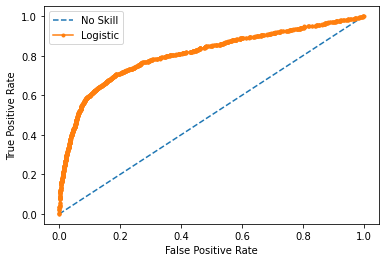

In [ ]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test_net.astype(np.float32).squeeze(1)))]


# predict probabilities and keep probabilities for the positive outcome only
#lr_probs = model.predict_proba(testX)
y_scores = gs.predict_proba(X_test_net.astype(np.float32))[:, 1]
#lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test_net.astype(np.float32).squeeze(1), ns_probs)
lr_auc = roc_auc_score(y_test_net.astype(np.float32).squeeze(1), y_scores)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_net.astype(np.float32).squeeze(1), ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test_net.astype(np.float32).squeeze(1), y_scores)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='MLP')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### Precision vs Recall


In [ ]:
def precision_recall_curve_plot(precisions, recalls, thresholds):
    fig, ax = plt.subplots(figsize=(12,8))
    plt.plot(thresholds, precisions[:-1], "r--", label="Precisions")
    plt.plot(thresholds, recalls[:-1], "#424242", label="Recalls")
    plt.title("Precision and Recall \n Tradeoff", fontsize=18)
    plt.ylabel("Level of Precision and Recall", fontsize=16)
    plt.xlabel("Thresholds", fontsize=16)
    plt.legend(loc="best", fontsize=14)
    plt.xlim([-0.5, 1.5])
    plt.ylim([0, 1])
    plt.axvline(x=0.13, linewidth=3, color="#0B3861")
    plt.annotate('Best Precision and \n Recall Balance \n is at 0.6 \n threshold ', xy=(0.6, 0.49), xytext=(55, -40),
             textcoords="offset points",
            arrowprops=dict(facecolor='black', shrink=0.05),
                fontsize=12, 
                color='k')


#precision_recall_curve(lr_precision, lr_recall, lr_thresholds)
#plt.show()

**Confusion Matrix of the best selected MLP model (Training with entire training data)**

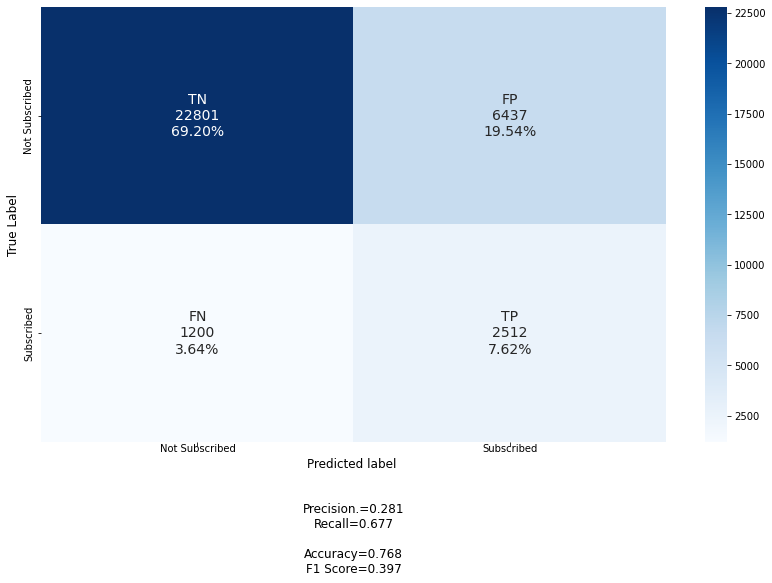

In [16]:
mlp_best_model = load('mlp_best_model.joblib') 

y_pred_mlp = mlp_best_model.predict(X_train.astype(np.float32))
conf_matrix = confusion_matrix(y_train.ravel(), y_pred_mlp)
plot_confusion_matrix(conf_matrix, target_names= ['Not Subscribed', 'Subscribed'],plot_type='MLP')

### Test best chosen model

## 4.2. SVM Implementation

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

oversample = SMOTE(random_state=2)
X_sm, Y_sm = oversample.fit_resample(X_scaled, y.ravel())
X_sm.shape, Y_sm.shape


Before OverSampling, counts of label '1': [4640]
Before OverSampling, counts of label '0': [36548] 



((73096, 8), (73096,))

### Linear SVM model (Linear kernel)

Before applying optimization we decided to apply a linear kernel to test validation set performance using the same dataset as the one used for training the neural network. We will use the same pipeline (imblearn) and run the sklearn implementation of SVC with a linear kernel against the training set. 

#### Let's define a SVC instance with a linear kernel and a default value for C regularization hyperparameter (1.0) and auto value for gamma which is set to 1 / n_features (approximately 0.025 ~ 1/40)

In [ ]:
# SVC(gamma='auto')
1/40

0.025

In [ ]:
# Define resampling technique (SMOTE and RandomUndersampler)
over = SMOTE(sampling_strategy=0.3, random_state=2 ,k_neighbors=11)
under = RandomUnderSampler(sampling_strategy=0.5, random_state=2)

# Create a Imbalance Pipeline with Over Sampling and Under Sampling for SVM
svm_pipeline = imbPipeline([('scaler',scaler), 
                            ('o', over),('u', under), 
                            ('svc', SVC(gamma='auto'))])

### Train SVM with linear kernel

In [ ]:
svm_model = svm_pipeline
svm_model.fit(X_train_net, y_train_net)

Pipeline(steps=[('scaler', StandardScaler()),
                ('o',
                 SMOTE(k_neighbors=11, random_state=2, sampling_strategy=0.3)),
                ('u',
                 RandomUnderSampler(random_state=2, sampling_strategy=0.5)),
                ('svc', SVC(gamma='auto'))])

## Plot learning curves of Linear SVC (Using CV validation with K=5)

SVM (Linear kernel) took 369.04 seconds for 5 CV folds of K={}


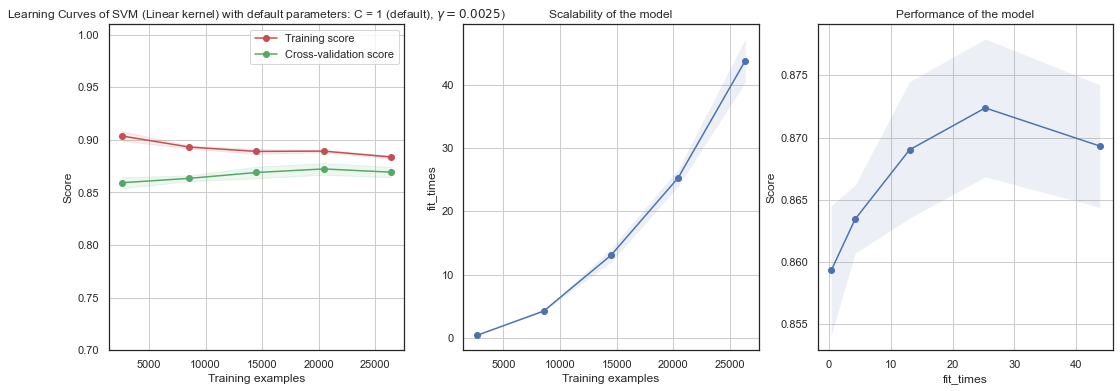

In [ ]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    if axes is None:
        _, axes = plt.subplots(3, 1, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(1, 3, figsize=(18, 6))


title = r"Learning Curves of SVM (Linear kernel) with default parameters: C = 1 (default), $\gamma=0.0025$)"

# SVC is expensive so we can perform a lower number of CV iterations of 5
svm_linear_split = 5
cv = StratifiedKFold(n_splits=svm_linear_split, shuffle=True, random_state=2)
starttime = time.time()
plot_learning_curve(svm_model, title, X_train_net, y_train_net, axes=axes, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)
totaltime = time.time() - starttime

print("SVM (Linear kernel) took %.2f seconds for %d CV folds of K={}" % ((totaltime), svm_linear_split))

plt.show()

In [ ]:
# fit a SVM model to the data
svm_model = LinearSVC()
start = time.time()
model.fit(X_sm, Y_sm.ravel())
lsvm_time = time.time() - start
lsvm_score = 100 * model.score(X_sm, Y_sm)

# Perform predictions
expected = Y_sm
predicted = model.predict(X_sm)

# Summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

print(f"Linear SVM score on raw features: {lsvm_score:.2f}%")
print('Linear SVM time on raw features:',lsvm_time)

C:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

           0       0.71      0.73      0.72     36548
           1       0.72      0.71      0.72     36548

    accuracy                           0.72     73096
   macro avg       0.72      0.72      0.72     73096
weighted avg       0.72      0.72      0.72     73096

[[26558  9990]
 [10629 25919]]
Linear SVM score on raw features: 71.79%
Linear SVM time on raw features: 14.083805799484253


In [ ]:


#fit a SVM model to the data
svm_model = SVC(kernel='rbf') 
start = time.time()
svm_model.fit(X_sm, Y_sm.ravel())
lsvm_time = time.time() - start
lsvm_score = 100 * model.score(X_sm, Y_sm)

# Perform predictions
expected = Y_sm
predicted = model.predict(X_sm)

# Summarize the fit of the model
print(metrics.classification_report(expected, predicted))


## Systematic approach to test other kernels and hyperparameters

### Let's first define the pipeline 

We will use the same pipeline as the one used before and the only difference would be the hyperparameters and the heuristic of the model. Due to the large size of the training set the SVM algorithm can take a long time to complete the hyperparameter search. The fit time scales at least quadratically with the number of samples and may be impractical beyond 10000 samples according to studies.

Due to the large size of the training set (32950 observations) we opted to optimise using a stratified sample of the training set defined to 70%, which will maintain the same proportion of classes.
After that we apply Standardisation, SMOTE and UnderSampling (only runs for the training set) enclosed in a pipeline to run a RandomizedSearch cross-validation using SVM with several parameter configurations for the 3 kernel initially selected (linear, poly, rbf) and C and gamma intervals as well.

Then we will run the same configuration using RandomizedSearch cross-validation and compare if the results outperforms GridSearch.

At last we will select the best parameters and train again using the entire training set and use the model object to predict the results against the original test set previously defined.

### Split training set (32,950 observations) with a stratified sample of 50% of the original training set size.

In [ ]:
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_train, 
                                                                    y_train, 
                                                                    test_size=0.75, 
                                                                    random_state=42, 
                                                                    stratify=y_train)

### New dataset

In [ ]:
print('Minority class percentage in 50% stratified sample',sum(y_train_svm==1)/y_train_svm.shape[0])
print('Minority class observations in 50% stratified sample',X_train_svm.shape)

Minority class percentage in 50% stratified sample [0.11266238]
Minority class observations in 50% stratified sample (8237, 40)


In [ ]:
# svm_rs = GridSearchCV(svm_smp_pipeline, param_grid, cv = 5, scoring = "accuracy", n_jobs = -1, verbose = 42)


# svm_nonlinear = {'C': [0.0001, 0.00000001], #, 0.00001, 0.0001],
#               'gamma': [0.01], #1, 0.1, 0.01, 0.001,'auto'], 
#               'kernel': ['rbf']} #'poly', 'rbf', 'sigmoid']}
# param_grid = {'clf__kernel': svm_nonlinear['kernel'], 'clf__C': svm_nonlinear['C'], 'clf__gamma': svm_nonlinear['gamma']}
# #[svm_nonlinear] #,svm_linear

# t0= time()
# grid = GridSearchCV(svm_smp_pipeline, param_grid, cv = 3, scoring = "accuracy", n_jobs = 4, verbose = 5)
# clf = grid.fit(X_train_svm, y_train_svm.ravel())

# print("done in %0.3fs" % (time() - t0))
# print("Best estimator found by grid search:")
# print(clf.best_estimator_)

### Now we can define the hyperparameters space that will be used first. We opted for not using poly kernel, which are more suitable for Grid Search and the absence of proper hyperparameters to tune in a Random Search (our case). Therefore, we propose to optimize the algorithm using only the 2 other kernels (Linear and RBF).

### Randomized Search of Hyperparameters for SVM algorithm

Hyperparameters will be set in the following interval:

- C values ranging in [1, 10, 100, 1000]
- Gamma values in [0.001, 0.0001].

In [ ]:
def train_svm_best_model(X_train_model, y_train_model, n_iter = 10):
    
    scaler = preprocessing.StandardScaler()
    
    # Define resampling technique
    over = SMOTE(sampling_strategy=0.2, k_neighbors=7, random_state=2)
    rand_under = RandomUnderSampler(sampling_strategy='majority', random_state=2)
    
    # define model weights
    weights = 'balanced' 
    #weights = {0:12.0, 1:88.0}

    # Create a Imbalance Pipeline with Over Sampling and Under Sampling
    svm_smp_pipeline = imbPipeline([('scaler',scaler), 
                                    ('o', over), ('ru', rand_under), 
                                    #('u', under), 
                                    ('svm', SVC(class_weight=weights,random_state=2,probability=False))])

    # Define Hyperparameters Space
    svm_params = [{'svm__kernel': ['rbf'], 'svm__gamma': loguniform(1e-4, 1e-3), 'svm__C': loguniform(1e0, 1e3)},
                 #{'svm__kernel': ['poly'], 'svm__degree': [2, 3, 4, 5]},
                  {'svm__kernel': ['linear'], 'svm__C': loguniform(1e0, 1e3)}]

    
    scorersSVM = {
        'precision_score': make_scorer(precision_score, zero_division=1),
        'recall_score': make_scorer(recall_score, zero_division=1),
        'accuracy_score': make_scorer(accuracy_score),
        'roc_auc_score': make_scorer(roc_auc_score,average='weighted'),
        'average_precision_score': make_scorer(average_precision_score),
        'f1_score': make_scorer(f1_score)
    }

    skf = StratifiedKFold(n_splits=3,shuffle=True, random_state=2)

    svm_rs = RandomizedSearchCV(svm_smp_pipeline, svm_params, refit='roc_auc_score', cv=skf, scoring=scorersSVM, 
                                n_iter=n_iter, random_state=123, verbose=3, return_train_score=True)

    starttime = time.time()
    svm_model_selection = svm_rs.fit(X_train_model, y_train_model.ravel())

    totaltime = time.time() - starttime

    print("SVM (RandomSearch) took %.2f seconds for %d CV folds." % ((totaltime), 3))

    print("best score: {}, best score: {}".format(svm_model_selection.best_params_, svm_model_selection.best_score_))
    
    return svm_model_selection

In [ ]:
svm_model_selection = train_svm_best_model(X_train_svm, y_train_svm, n_iter = 32)

#svm_best_model = train_svm_best_model(X_train,y_train,svm_model_selection)

# with open('svm_best_model.pkl', 'wb') as fid:
#      pkl.dump(svm_best_model, fid)

# files.download('svm_best_model.pkl')

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV 1/3] END svm__C=137.67844795855254, svm__gamma=0.00026820750502750263, svm__kernel=rbf; accuracy_score: (train=0.731, test=0.726) average_precision_score: (train=0.208, test=0.205) f1_score: (train=0.368, test=0.363) precision_score: (train=0.250, test=0.246) recall_score: (train=0.695, test=0.695) roc_auc_score: (train=0.715, test=0.712) total time=   2.0s
[CV 2/3] END svm__C=137.67844795855254, svm__gamma=0.00026820750502750263, svm__kernel=rbf; accuracy_score: (train=0.737, test=0.738) average_precision_score: (train=0.210, test=0.214) f1_score: (train=0.371, test=0.377) precision_score: (train=0.254, test=0.257) recall_score: (train=0.688, test=0.701) roc_auc_score: (train=0.716, test=0.722) total time=   2.2s
[CV 3/3] END svm__C=137.67844795855254, svm__gamma=0.00026820750502750263, svm__kernel=rbf; accuracy_score: (train=0.731, test=0.732) average_precision_score: (train=0.210, test=0.204) f1_score: (train=0.371, te

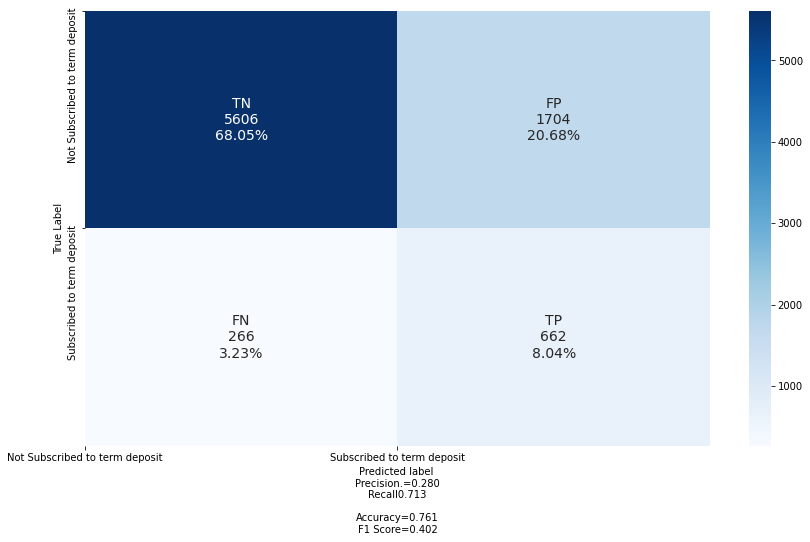

In [ ]:

def plot_confusion_matrix(cf_matrix, target_names=None):

    group_names = ['TN', 'FP', 'FN', 'TP']
    group_counts = ["{0:.0f}".format(value) for value in 
                    cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in 
                         cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in 
              zip(group_names,
                  group_counts,
                  group_percentages)
             ]
    labels = np.asarray(labels).reshape(2, 2)

    plt.figure(figsize = (14, 8))
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues',  annot_kws={"size": 14})
    if target_names:
        tick_marks = range(len(target_names))
        plt.xticks(tick_marks, target_names)
        plt.yticks(tick_marks, target_names)

    precision = cf_matrix[1, 1] / sum(cf_matrix[:, 1])
    recall    = cf_matrix[1, 1] / sum(cf_matrix[1,:])
    accuracy  = np.trace(cf_matrix) / float(np.sum(cf_matrix))
    f1_score  = 2 * precision * recall / (precision + recall)
    stats_text = "\nPrecision.={:0.3f}\nRecall{:0.3f}\n\nAccuracy={:0.3f}\nF1 Score={:0.3f}".format(
        precision, recall, accuracy, f1_score)
    plt.xlabel('Predicted label {}'.format(stats_text))
    plt.ylabel("True Label")
    plt.show()

y_pred_svm = svm_best_model.predict(X_train)
conf_matrix = confusion_matrix(y_train.ravel(), y_pred_svm)
plot_confusion_matrix(conf_matrix, target_names= ['Not Subscribed to term deposit', 'Subscribed to term deposit'])


In [ ]:
svm_model_selection.cv_results_

{'mean_fit_time': array([  1.05025466,   0.96830765, 293.83060439, 158.87335817,
          0.86085598,   1.05450463, 167.30085182,   1.01373204,
          0.85539714, 117.52681748,   0.9350187 ,   1.01454131,
          0.86615554,   0.92007136,   0.90458592,   0.86722787,
        250.06133938,   1.36155486,  76.95310855,   0.86241674,
        630.86465716,  43.52959538,   9.06285739,   0.91291944,
          1.08985551,  16.97333662,   0.87658985, 516.29614147,
         38.50622892,   0.97705626,   0.89802027,   1.03991922]),
 'mean_score_time': array([1.03323754, 1.04526631, 0.39837607, 0.39350565, 1.08787688,
        1.06155554, 0.40133023, 1.00534272, 1.07570481, 0.39426335,
        1.03642384, 1.01602705, 1.02935918, 1.00253352, 1.28196875,
        1.01361783, 0.39660406, 0.98563433, 0.4006474 , 1.05305847,
        0.39563513, 0.39488816, 0.39566429, 1.04066682, 1.01246182,
        0.39719017, 1.0222377 , 0.39907424, 0.39618707, 1.01317207,
        1.02336796, 1.08561317]),
 'mean_t

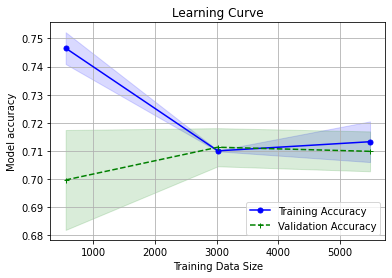

In [ ]:
# Use learning curve to get training and test scores along with train sizes
#
train_sizes, train_scores, test_scores = learning_curve(estimator=svm_model_selection, X=X_train_svm, y=y_train_svm,
                                                       cv=3, train_sizes=np.linspace(0.1, 1.0, 3),n_jobs=-1)
#
# Calculate training and test mean and std
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#
# Plot the learning curve
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

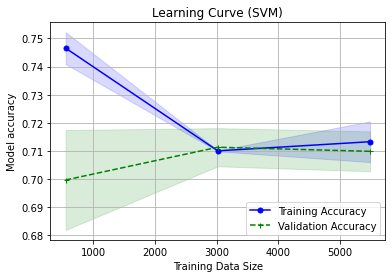

In [ ]:
# Plot the learning curve
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve (SVM)')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

In [ ]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [ ]:
#svm_best_model = train_svm_best_model(X_train,y_train,svm_model_selection)

df_RandomSearchResults_svm = pd.concat([pd.DataFrame(svm_model_selection.cv_results_["params"]),
    pd.DataFrame(svm_model_selection.cv_results_['mean_test_accuracy_score'], columns=['Accuracy']),
    pd.DataFrame(svm_model_selection.cv_results_['mean_test_roc_auc_score'],columns=['ROC_AUC']),
    pd.DataFrame(svm_model_selection.cv_results_['mean_test_precision_score'],columns=['precision']),
    pd.DataFrame(svm_model_selection.cv_results_['mean_test_recall_score'],columns=['recall']),
    pd.DataFrame(svm_model_selection.cv_results_['mean_test_average_precision_score'], columns=['PR_AUC'])],axis=1)

df_RandomSearchResults_svm.sort_values(by=['ROC_AUC'],ascending=False).head(32).to_csv('svm_random_search_hyperparameters.csv')

In [ ]:
# with open('svm_model_selection.pkl', 'wb') as fid:
#     pkl.dump(svm_model_selection, fid)

#files.download('svm_model_selection.pkl')
#files.download('svm_random_search_hyperparameters.csv')

### Generate scores of predictions for the best hyperparameters

In [ ]:
#pd.options.display.max_rows = 100

df_RandomSearchResults_svm = pd.concat([pd.DataFrame(svm_model_selection.cv_results_["params"]),
    pd.DataFrame(svm_model_selection.cv_results_['mean_test_accuracy_score'], columns=['Accuracy']),
    pd.DataFrame(svm_model_selection.cv_results_['mean_test_roc_auc_score'],columns=['ROC_AUC']),
    pd.DataFrame(svm_model_selection.cv_results_['mean_test_average_precision_score'], columns=['PR_AUC'])],axis=1)

df_RandomSearchResults_svm.sort_values(by=['ROC_AUC'],ascending=False)

,svm__C,svm__gamma,svm__kernel,Accuracy,ROC_AUC,PR_AUC
17,679.954817,0.000318,rbf,0.785250,0.721179,0.227452
1,45.075890,0.000524,rbf,0.739423,0.716520,0.210983
5,153.868288,0.000275,rbf,0.738634,0.716311,0.210680
29,57.254504,0.000422,rbf,0.732018,0.714228,0.207898
0,137.678448,0.000268,rbf,0.731836,0.714125,0.207801
24,247.277856,0.000192,rbf,0.729408,0.713933,0.207138
10,29.940175,0.000550,rbf,0.727284,0.713442,0.206400
11,147.004337,0.000210,rbf,0.720910,0.712908,0.204779
31,195.455783,0.000175,rbf,0.720182,0.712498,0.204394
7,163.676458,0.000152,rbf,0.719393,0.712053,0.203981


Plot SVM Hyperparameter Results

In [ ]:
df_RandomSearchResults_svm

,C,Gamma,Kernel,Accuracy,ROC_AUC,PR_AUC
0,137.678448,0.000268,1,0.731836,0.714125,0.207801
1,45.075890,0.000524,1,0.739423,0.716520,0.210983
2,218.818122,0.000000,0,0.719454,0.711852,0.203872
3,113.367669,0.000000,0,0.719454,0.711852,0.203872
4,2.629374,0.000252,1,0.719454,0.711852,0.203872
5,153.868288,0.000275,1,0.738634,0.716311,0.210680
6,121.413095,0.000000,0,0.719454,0.711852,0.203872
7,163.676458,0.000152,1,0.719393,0.712053,0.203981
8,1.783115,0.000516,1,0.719393,0.711583,0.203705
9,80.020798,0.000000,0,0.719454,0.711852,0.203872


Based on ROC Curve

In [ ]:
Based on ROC Curve

In [ ]:
# Rename columns to a more explainable name
df_RandomSearchResults_svm.rename({'svm__C': 'C', 'svm__gamma': 'Gamma', 
          'svm__kernel': 'Kernel {0:Linear,1:RBF}'}, 
          axis=1, inplace=True)

df_RandomSearchResults_svm['Gamma'].fillna(0,inplace=True)

df_RandomSearchResults_svm['Kernel {0:Linear,1:RBF}'].replace('linear',0,inplace=True)
df_RandomSearchResults_svm['Kernel {0:Linear,1:RBF}'].replace('rbf',1,inplace=True)

cols = ['C', 'Gamma', 'Kernel {0:Linear,1:RBF}', 'ROC_AUC']

fig = px.parallel_coordinates(df_RandomSearchResults_svm, color='ROC_AUC', dimensions=cols, 
                              color_continuous_scale=px.colors.sequential.Viridis,
                              title="SVM Hyperparameter Search Plot (ROC_AUC)",
                              width=1000, height=700)

fig.show()

Based on Accuracy

In [ ]:
# Based on Accuracy

In [ ]:
df_RandomSearchResults_svm

,C,Gamma,Kernel,Accuracy,ROC_AUC,PR_AUC
0,137.678448,0.000268,rbf,0.731836,0.714125,0.207801
1,45.075890,0.000524,rbf,0.739423,0.716520,0.210983
2,218.818122,NaN,linear,0.719454,0.711852,0.203872
3,113.367669,NaN,linear,0.719454,0.711852,0.203872
4,2.629374,0.000252,rbf,0.719454,0.711852,0.203872
5,153.868288,0.000275,rbf,0.738634,0.716311,0.210680
6,121.413095,NaN,linear,0.719454,0.711852,0.203872
7,163.676458,0.000152,rbf,0.719393,0.712053,0.203981
8,1.783115,0.000516,rbf,0.719393,0.711583,0.203705
9,80.020798,NaN,linear,0.719454,0.711852,0.203872


In [ ]:
# Rename columns to a more explainable name
# df_RandomSearchResults_svm.rename({'svm__C': 'C', 'svm__gamma': 'Gamma', 
#           'svm__kernel': 'Kernel'}, 
#           axis=1, inplace=True)

cols = ['C', 'Gamma', 'Kernel {0:Linear,1:RBF}', 'Accuracy']

fig = px.parallel_coordinates(df_RandomSearchResults_svm, color='Accuracy', dimensions=cols, 
                              color_continuous_scale=px.colors.sequential.Viridis,
                              title="SVM Hyperparameter Search Plot (Accuracy)",
                              width=1000, height=700)

fig.show()

**Analysis of C and Gamma Parameters (Using Accuracy and ROC-AUC)**

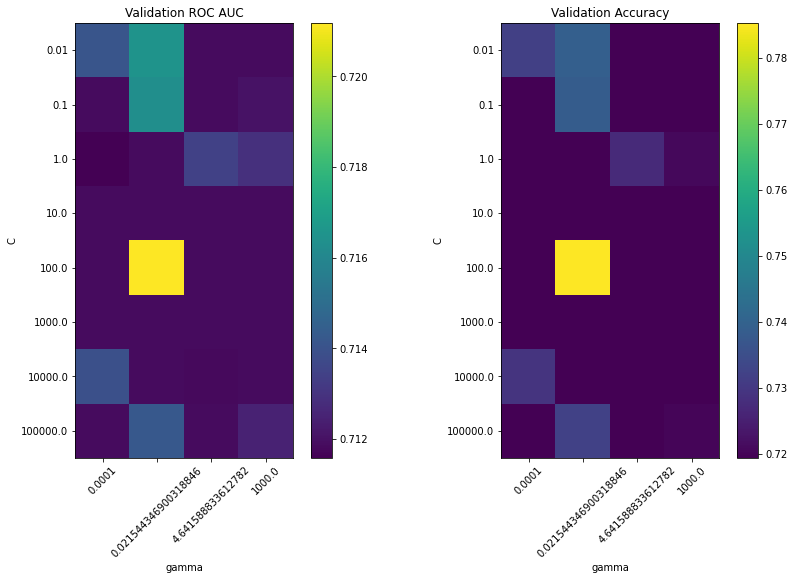

In [ ]:
C_range = np.logspace(-2, 5, 8)
gamma_range = np.logspace(-4, 3, 4)
param_grid = dict(gamma=gamma_range, C=C_range)

scores_roc = svm_model_selection.cv_results_['mean_test_roc_auc_score'].reshape(len(C_range),len(gamma_range))
scores_acc = svm_model_selection.cv_results_['mean_test_accuracy_score'].reshape(len(C_range),len(gamma_range))

min_roc = min(svm_model_selection.cv_results_['mean_test_roc_auc_score'])
max_roc = max(svm_model_selection.cv_results_['mean_test_roc_auc_score'])
mid_roc = min_roc + ((max_roc - min_roc)/2)

min_acc = min(svm_model_selection.cv_results_['mean_test_accuracy_score'])
max_acc = max(svm_model_selection.cv_results_['mean_test_accuracy_score'])
mid_acc = min_acc + ((max_acc - min_acc)/2)

fig = plt.figure(figsize=(14, 8)) # create the canvas for plotting
ax1 = plt.subplot(1,2,1) 
#ax[0] = plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
im1 = ax1.imshow(scores_roc, interpolation='nearest', cmap=plt.cm.viridis,
           norm=MidpointNormalize(vmin=min_roc, vmax=max_roc, midpoint=mid_roc))
ax1.set_xlabel('gamma')
ax1.set_ylabel('C')
fig.colorbar(im1)
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
ax1.set_title('Validation ROC AUC')

ax2 = plt.subplot(1,2,2) 
#ax[0] = plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
im2 = ax2.imshow(scores_acc, interpolation='nearest', cmap=plt.cm.viridis,
           norm=MidpointNormalize(vmin=min_acc, vmax=max_acc, midpoint=mid_acc))
ax2.set_xlabel('gamma')
ax2.set_ylabel('C')
fig.colorbar(im2)
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
ax2.set_title('Validation Accuracy')


plt.show()

## Train the final model on the entire training dataset

In [ ]:
# Save the model when finds the best train and validation losses

def train_svm_best_model(X_train_model,y_train_model,model):

    #     svm_C = model.best_params_['svm__C']
    #     svm_gamma = model.best_params_['svm__gamma']
    #     svm_degree = model.best_params_['svm__degree']
    #     svm_kernel = model.best_params_['svm__kernel']
    
    weights = 'balanced'
    svm_retrain = SVC(probability=True,  class_weight = weights, random_state=2)

    scaler = preprocessing.StandardScaler()
    over = SMOTE(sampling_strategy=0.2, random_state=2 ,k_neighbors=7)
    #under = EditedNearestNeighbours(sampling_strategy='majority', n_neighbors=7)
    rand_under = RandomUnderSampler(sampling_strategy='majority', random_state=2)


    # Define the Imbalanced Pipeline with SMOTE and Random Under Sampling
    svm_pipeline_retrain = imbPipeline([('scaler',scaler), 
                                ('o', over), #('u', under),
                                ('ru', rand_under), 
                                ('svm', svm_retrain)])
    
    # The command below (**model.best_params_) will copy the hyperparameters from the
    # best model to the svm model in the pipeline
    svm_pipeline_retrain.set_params(**model.best_params_)
    
    starttime = time.time()
    
    svm_best_model = svm_pipeline_retrain.fit(X_train_model, y_train_model.ravel())
    
    totaltime = time.time() - starttime    
    print("Final model train (SVM) took %.2f seconds (%.2f hours) to train on the entire training data" % ((totaltime), (totaltime/3600)))

    return svm_best_model

In [ ]:
svm_best_model = train_svm_best_model(X_train,y_train,svm_model_selection)

# save the classifier
# with open('svm_best_model.pkl', 'wb') as fid:
#     pkl.dump(svm_best_model, fid) 

Final model train (SVM) took 66.86 seconds (0.02 hours) to train on the entire training data


In [ ]:
# dump(svm_model_selection,'svm_model_selection.joblib')
# dump(svm_best_model,'svm_best_model.joblib')

['svm_best_model.joblib']

We will analyse the Precision-Recall curve over the training set using the best model (Training over the entire training data)

In [ ]:
y_pred_proba_svm = svm_best_model.predict_proba(X_train.astype(np.float32))[:,1]
precision, recall, thresholds = precision_recall_curve(y_train, y_pred_proba_svm)
precision_recall_threshold(precision, recall, thresholds, y_train, y_pred_proba_svm, t=0.5, plot_type='SVM',savefig='No')

We will analyse the Precision-Recall curve over the training set using the best model (Training over the entire training data)

In [ ]:
y_pred_svm = svm_best_model.predict(X_test_unscaled)  
conf_matrix = confusion_matrix(y_test.ravel(), y_pred_svm)
plot_confusion_matrix(conf_matrix, target_names= ['Not Subscribed to term deposit', 'Subscribed to term deposit'],
                     plot_type='svm','No')

# Save to png

Now we want to analyse how the model can be compared against the training data:

- True Positives: Total number of correct predictions of a client subscription.

- False Positives: The model predicted a subscription but the client did not subscribe.

- True Negatives: Total number of correct predictions of clients not subscribed.

- False Negative: The model predicted a non subscription but the client is subscribed.


- Precision: TP / (TP+FP)
It can be defined as the number of positive predictions (subscriptions) over the total number of predictions.
 

- Recall: TN / (TP+FN)

From the above definitions we can clearly state that  False Positives can generate less benefits compared to False Negatives. Therefore it is more important to have less False Positives than the opposite.


F1-Score:
Support: Each class has a support number to represent the amount of examples for the class.


In [17]:

#gs.fit(X_test_net.astype(np.float32), y_test_net.astype(np.float32).squeeze(1))
y_train_preds = svm_best_model.predict(X_train.astype(np.float32))
actual_label = y_train.astype(np.float32).squeeze(1)

f1 = f1_score(actual_label, y_train_preds)
#fbeta_score = fbeta_score(actual_label, y_train_preds, average='weighted', beta=0.5)
accuracy = accuracy_score(actual_label, y_train_preds)
roc_auc = roc_auc_score(actual_label, y_train_preds)
cm = confusion_matrix(actual_label, y_train_preds)
report = classification_report(actual_label, y_train_preds)

print("Model ROC-AUC(Train Data): ", roc_auc)
print("Model F1-Score (Train Data): ", f1)
#print("Model FBeta-Score (Train Data): ", fbeta_score)
print("Model Accuracy: ", accuracy)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", report)

Model ROC-AUC(Train Data):  0.7341615964315451
Model F1-Score (Train Data):  0.41656744344276236
Model Accuracy:  0.7918057663125948
Confusion Matrix:
 [[23641  5597]
 [ 1263  2449]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.81      0.87     29238
         1.0       0.30      0.66      0.42      3712

    accuracy                           0.79     32950
   macro avg       0.63      0.73      0.64     32950
weighted avg       0.88      0.79      0.82     32950



### ROC-AUC Curve

In [19]:
yhat_svm = svm_best_model.predict_proba(X_train.astype(np.float32))
# keep probabilities for the positive outcome only
yhat_svm = yhat_svm[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat_svm)

In [20]:
plot_roc_auc_thresholds(fpr, tpr, thresholds, y_train, yhat_svm, plot_type='SVM')

Best Threshold=0.472036, G-Mean=0.731


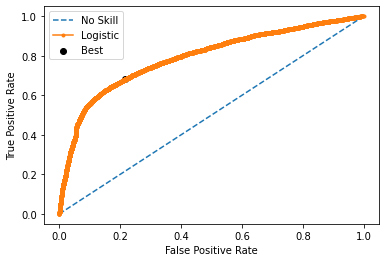

In [21]:
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

### Precision-Recall Curve (PR-AUC)

In [22]:
# Data to plot precision - recall curve
precision, recall, thresholds = precision_recall_curve(y_train, yhat_svm)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall = auc(recall, precision)
print('PR-AUC:',auc_precision_recall)

PR-AUC: 0.39958878639923034


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


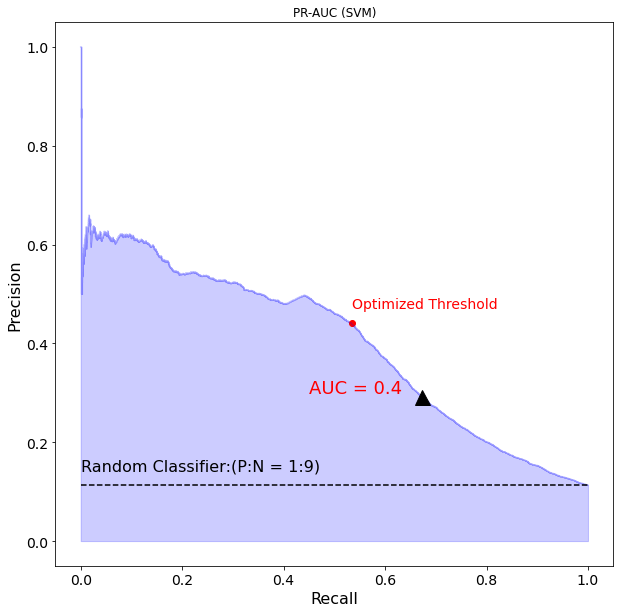

In [27]:
precision_recall_threshold(precision, recall, thresholds, y_train, yhat_svm, t=0.5, plot_type='SVM',savefig='No')

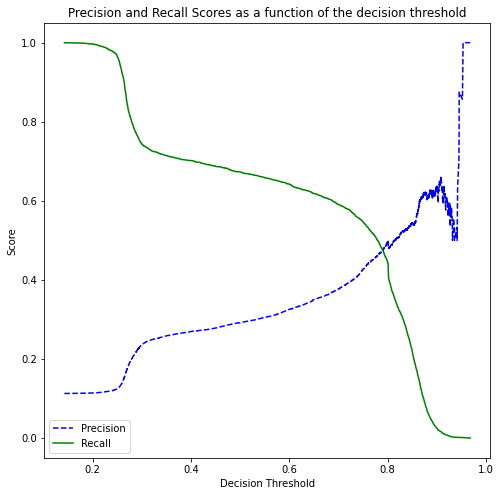

In [24]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')
    
plot_precision_recall_vs_threshold(precision, recall, thresholds)

**Confusion Matrix of the SVM model selection (Training with cross-validation over 50% of the training sample)**

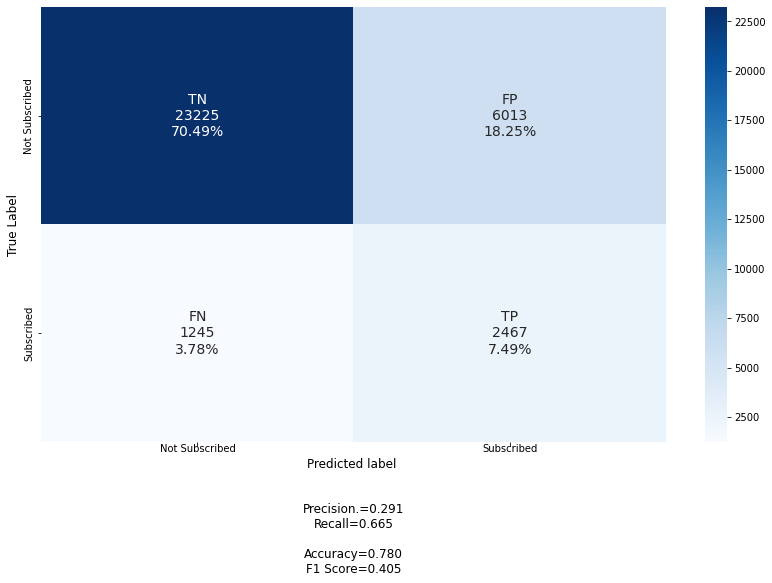

In [ ]:
y_pred_svm = svm_model_selection_pred.predict(X_train)
conf_matrix = confusion_matrix(y_train.ravel(), y_pred_svm)
plot_confusion_matrix(conf_matrix, target_names=['Not Subscribed', 'Subscribed'],plot_type='svm')

**Confusion Matrix of the best selected SVM model (Training with entire training data)**

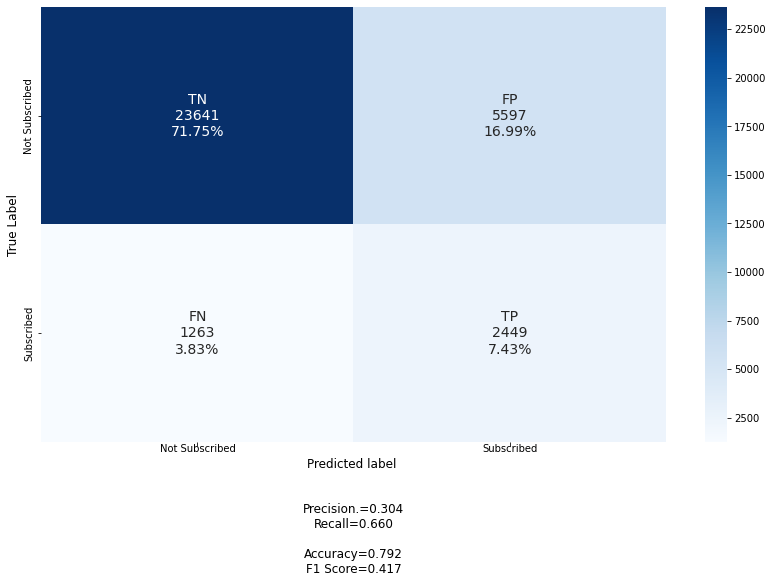

In [ ]:
y_pred_svm = svm_best_model.predict(X_train)
conf_matrix = confusion_matrix(y_train.ravel(), y_pred_svm)
plot_confusion_matrix(conf_matrix, target_names= ['Not Subscribed', 'Subscribed'],plot_type='svm')

## Save final model (classifier) for prediction on the test set

In [ ]:
# from google.colab import files

# files.download('svm_best_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Training Data

# save the classifier
with open('svm_best_model.pkl', 'wb') as fid:
    pkl.dump(svm_best_model, fid) 

In [ ]:
y_score_svm = svm_model_selection.fit(X_train_svm, y_train_svm).decision_function(X_test_net)

n_classes = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_net[:, i], y_score_svm[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_net.ravel(), y_score_svm.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

Due to the large size of the training set the SVM algorithm can take a long time to complete the hyperparameter search.
The fit time scales at least quadratically with the number of samples and may be impractical beyond 10000 samples.

## RandomizedSearch implementation

### Running in the entire training set and Predicting on the test set

In [ ]:
svm_model_selection.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('o',
                 SMOTE(k_neighbors=7, kind='deprecated',
                       m_neighbors='deprecated', n_jobs=1,
                       out_step='deprecated', random_state=2, ratio=None,
                       sampling_strategy=0.2, svm_estimator='deprecated')),
                ('ru',
                 RandomUnderSampler(random_state=2, ratio=None,
                                    replacement=False, return_indices=False,
                                    sampling_strategy='majority')),
                ('svm',
                 SVC(C=467.30141794802967, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma=0.0005628319006580491, kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrin

In [ ]:
#X_train_svm_scaled = scaler.StandardScaler()

#scaler = StandardScaler()
#X_train_svm_scaled = scaler.fit_transform(X_train_net.astype(np.float32))
#X_test_svm_scaled = scaler.transform(X_test_net.astype(np.float32))

# svm_grid.best_estimator_.fit(X_train_net, y_train_net)
# #y_pred = svm_grid.best_estimator_.predict(X_train_svm_scaled)
# #accuracy_score(y_train_net, y_pred)

y_true, y_pred = y_train_svm, svm_model_selection.predict(X_train_svm)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87      8771
           1       0.30      0.68      0.42      1114

    accuracy                           0.79      9885
   macro avg       0.63      0.74      0.65      9885
weighted avg       0.88      0.79      0.82      9885



In [ ]:

print("Predicting people's names on the test set")
t0 = time()
y_pred_svm = clf.predict(X_test_net)
print("done in %0.3fs" % (time() - t0))
target_names = ['Yes','No']

print(classification_report(y_test_net, y_pred_svm, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

Predicting people's names on the test set
done in 4.578s
              precision    recall  f1-score   support

         Yes       0.93      0.93      0.93      7303
          No       0.44      0.41      0.43       935

    accuracy                           0.87      8238
   macro avg       0.68      0.67      0.68      8238
weighted avg       0.87      0.87      0.87      8238



NameError: name 'y_pred' is not defined

##### Now let's apply a kernel transformation, as it is based on a similarity relationship (or kernel) between each pair of points.

In [ ]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

In [ ]:
y

array([3, 7, 7, ..., 5, 9, 5], dtype=int64)

## Loading Best Models for Inference

In [ ]:
# Load SVM model selection
svm_model_selection_filename = 'svm_model_selection.joblib'
svm_model_selection = load(svm_model_selection_filename)

# with open('svm_best_model.pkl', 'rb') as handle:
#     svm_model_selection_model = pkl.load(handle)

Saving test set for prediction on the saved models

In [ ]:
# Scale and fit using train distribution and apply scaler to transform test features
#scaler = preprocessing.StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

df_X_test = pd.DataFrame(data=X_test,columns=test_df_trans.columns)
df_y_test = pd.DataFrame(data=y_test,columns=['y'])

frames_test = [df_X_test,df_y_test]
df_test = pd.concat(frames_test, axis=1)
df_test.to_csv('test.csv',index=False)

In [ ]:
df_test.to_csv('test.csv',index=False)

### Saving MLP best learning model

In [ ]:
#torch.save(bestmodel.state_dict(), PATH)

# saving
# with open('best_model_MLP.pkl', 'wb') as f:
#     pkl.dump(rs, f)


nnet.save_params(f_params='best_model_MLP.pkl')

### Saving SVM best learning model

In [ ]:
#torch.save(bestmodel.state_dict(), PATH)

# saving
with open('best_model_SVM.pkl', 'wb') as f:
    pkl.dump(rs_SVM, f)

NameError: name 'rs_SVM' is not defined

#**7. Models reproducibility**

In [8]:

class AdaBound(Optimizer):
    """  AdaBound code from https://github.com/Luolc/AdaBound/blob/master/adabound/adabound.py
    Implements AdaBound algorithm.
    It has been proposed in `Adaptive Gradient Methods with Dynamic Bound of Learning Rate`_.
    Arguments:
        params (iterable): iterable of parameters to optimize or dicts defining
            parameter groups
        lr (float, optional): Adam learning rate (default: 1e-3)
        betas (Tuple[float, float], optional): coefficients used for computing
            running averages of gradient and its square (default: (0.9, 0.999))
        final_lr (float, optional): final (SGD) learning rate (default: 0.1)
        gamma (float, optional): convergence speed of the bound functions (default: 1e-3)
        eps (float, optional): term added to the denominator to improve
            numerical stability (default: 1e-8)
        weight_decay (float, optional): weight decay (L2 penalty) (default: 0)
        amsbound (boolean, optional): whether to use the AMSBound variant of this algorithm
    .. Adaptive Gradient Methods with Dynamic Bound of Learning Rate:
        https://openreview.net/forum?id=Bkg3g2R9FX
    """

    def __init__(self, params, lr=1e-3, betas=(0.9, 0.999), final_lr=0.1, gamma=1e-3,
                 eps=1e-8, weight_decay=0, amsbound=False):
        if not 0.0 <= lr:
            raise ValueError("Invalid learning rate: {}".format(lr))
        if not 0.0 <= eps:
            raise ValueError("Invalid epsilon value: {}".format(eps))
        if not 0.0 <= betas[0] < 1.0:
            raise ValueError("Invalid beta parameter at index 0: {}".format(betas[0]))
        if not 0.0 <= betas[1] < 1.0:
            raise ValueError("Invalid beta parameter at index 1: {}".format(betas[1]))
        if not 0.0 <= final_lr:
            raise ValueError("Invalid final learning rate: {}".format(final_lr))
        if not 0.0 <= gamma < 1.0:
            raise ValueError("Invalid gamma parameter: {}".format(gamma))
        defaults = dict(lr=lr, betas=betas, final_lr=final_lr, gamma=gamma, eps=eps,
                        weight_decay=weight_decay, amsbound=amsbound)
        super(AdaBound, self).__init__(params, defaults)

        self.base_lrs = list(map(lambda group: group['lr'], self.param_groups))

    def __setstate__(self, state):
        super(AdaBound, self).__setstate__(state)
        for group in self.param_groups:
            group.setdefault('amsbound', False)

    def step(self, closure=None):
        """Performs a single optimization step.
        Arguments:
            closure (callable, optional): A closure that reevaluates the model
                and returns the loss.
        """
        loss = None
        if closure is not None:
            loss = closure()

        for group, base_lr in zip(self.param_groups, self.base_lrs):
            for p in group['params']:
                if p.grad is None:
                    continue
                grad = p.grad.data
                if grad.is_sparse:
                    raise RuntimeError(
                        'Adam does not support sparse gradients, please consider SparseAdam instead')
                amsbound = group['amsbound']

                state = self.state[p]

                # State initialization
                if len(state) == 0:
                    state['step'] = 0
                    # Exponential moving average of gradient values
                    state['exp_avg'] = torch.zeros_like(p.data)
                    # Exponential moving average of squared gradient values
                    state['exp_avg_sq'] = torch.zeros_like(p.data)
                    if amsbound:
                        # Maintains max of all exp. moving avg. of sq. grad. values
                        state['max_exp_avg_sq'] = torch.zeros_like(p.data)

                exp_avg, exp_avg_sq = state['exp_avg'], state['exp_avg_sq']
                if amsbound:
                    max_exp_avg_sq = state['max_exp_avg_sq']
                beta1, beta2 = group['betas']

                state['step'] += 1

                if group['weight_decay'] != 0:
                    grad = grad.add(group['weight_decay'], p.data)

                # Decay the first and second moment running average coefficient
                exp_avg.mul_(beta1).add_(1 - beta1, grad)
                exp_avg_sq.mul_(beta2).addcmul_(1 - beta2, grad, grad)
                if amsbound:
                    # Maintains the maximum of all 2nd moment running avg. till now
                    torch.max(max_exp_avg_sq, exp_avg_sq, out=max_exp_avg_sq)
                    # Use the max. for normalizing running avg. of gradient
                    denom = max_exp_avg_sq.sqrt().add_(group['eps'])
                else:
                    denom = exp_avg_sq.sqrt().add_(group['eps'])

                bias_correction1 = 1 - beta1 ** state['step']
                bias_correction2 = 1 - beta2 ** state['step']
                step_size = group['lr'] * math.sqrt(bias_correction2) / bias_correction1

                # Applies bounds on actual learning rate
                # lr_scheduler cannot affect final_lr, this is a workaround to apply lr decay
                final_lr = group['final_lr'] * group['lr'] / base_lr
                lower_bound = final_lr * (1 - 1 / (group['gamma'] * state['step'] + 1))
                upper_bound = final_lr * (1 + 1 / (group['gamma'] * state['step']))
                step_size = torch.full_like(denom, step_size)
                step_size.div_(denom).clamp_(lower_bound, upper_bound).mul_(exp_avg)

                p.data.add_(-step_size)

        return loss

# Transform input variables
def transform_input(X_train, X_test, quant_var, nom_var, onehot_var, df):
    # Reconstruct features set
    X_train_df = pd.DataFrame(X_train, columns = df.drop('y', axis=1).columns)
    X_test_df = pd.DataFrame(X_test, columns = df.drop('y', axis=1).columns)
    
    # Define quantitative variables
    train_df_quant = X_train_df[quant_var]
    test_df_quant = X_test_df[quant_var]
    
    # Define Ordinal Encoder for Default, Housing, Loan variables
    ordn = OrdinalEncoder(categories=[['yes','unknown','no']]*3)    
    # Fit
    ordn.fit(X_train_df[['default','housing', 'loan']]) #train_df_ordinal[['default','housing', 'loan']])
    # Transform
    X_train_ord1 = ordn.transform(X_train_df[['default','housing', 'loan']])
    X_test_ord1 = ordn.transform(X_test_df[['default','housing', 'loan']])
    
    
    # Define Ordinal Encoder for Poutcome variable
    ordn = OrdinalEncoder(categories=[['failure','nonexistent','success']])
    # Fit
    ordn.fit(np.array(X_train_df['poutcome']).reshape(-1,1))
    # Transform
    X_train_ord2 = ordn.transform(X_train_df[['poutcome']])
    X_test_ord2 = ordn.transform(X_test_df[['poutcome']])
    
     # Define Ordinal Encoder for Contact variable
    ordn = OrdinalEncoder(categories=[['cellular','telephone']])
    # Fit
    ordn.fit(np.array(X_train_df['contact']).reshape(-1,1))
    # Transform
    X_train_ord3 = ordn.transform(X_train_df[['contact']])
    X_test_ord3 = ordn.transform(X_test_df[['contact']])
    
    # Define Ordinal Encoder for Contact variable
    ordn = OrdinalEncoder(categories=[['mon','tue','wed','thu','fri']])
    # Fit
    ordn.fit(np.array(X_train_df['day_of_week']).reshape(-1,1))
    # Transform
    X_train_ord4 = ordn.transform(X_train_df[['day_of_week']])
    X_test_ord4 = ordn.transform(X_test_df[['day_of_week']])
    
    
    # Define Ordinal Encoder for Month variable
    ordn = ce.OrdinalEncoder(cols=['month'], return_df=True, mapping = [{
                           'col': 'month', 'mapping': { 
                           'jan': 1, 'feb': 2, 'mar': 3, \
                           'apr': 4, 'may': 5, 'jun': 6,  'jul': 7, \
                           'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}}])

    # Fit
    ordn.fit(X_train_df['month'])
    # Transform
    X_train_ord5 = ordn.transform(X_train_df[['month']])
    X_test_ord5 = ordn.transform(X_test_df[['month']])
    
    
    # Define OneHot Encoder
    ohe = OneHotEncoder(handle_unknown='error') #,drop='first',
    # Fit
    ohe.fit(X_train_df[nom_var])
    onehot_list = ohe.get_feature_names(nom_var)
    # Transform
    X_train_nom = ohe.transform(X_train_df[nom_var])
    X_test_nom = ohe.transform(X_test_df[nom_var])
    
    # Create dataframe (training)
    train_df_ord1 = pd.DataFrame(X_train_ord1, columns = ['default','housing', 'loan'])
    train_df_ord2 = pd.DataFrame(X_train_ord2, columns = ['poutcome'])
    train_df_ord3 = pd.DataFrame(X_train_ord3, columns = ['contact'])
    train_df_ord4 = pd.DataFrame(X_train_ord4, columns = ['day_of_week'])
    train_df_ord5 = pd.DataFrame(X_train_ord5, columns = ['month'])
    train_df_nom =  pd.DataFrame(X_train_nom.toarray(), columns = list(onehot_list))
    
    # Create dataframe (test)
    test_df_ord1 = pd.DataFrame(X_test_ord1, columns = ['default','housing', 'loan'])
    test_df_ord2 = pd.DataFrame(X_test_ord2, columns = ['poutcome'])
    test_df_ord3 = pd.DataFrame(X_test_ord3, columns = ['contact'])
    test_df_ord4 = pd.DataFrame(X_test_ord4, columns = ['day_of_week'])
    test_df_ord5 = pd.DataFrame(X_test_ord5, columns = ['month'])
    test_df_nom =  pd.DataFrame(X_test_nom.toarray(), columns = list(onehot_list))

    # Concatenate dataframes (quantitative / categorical) for training / test
    train_frames = [train_df_ord1, train_df_ord2, train_df_ord3, train_df_ord4, 
                    train_df_ord5, train_df_nom, train_df_quant]
    test_frames = [test_df_ord1, test_df_ord2, test_df_ord3, test_df_ord4, 
                   test_df_ord5, test_df_nom, test_df_quant]
    train_df_trans = pd.concat(train_frames, axis=1)
    test_df_trans = pd.concat(test_frames, axis=1)
    
    #print(X_train_trans, X_test_trans)
    return train_df_trans, test_df_trans
    
    
# Transform target variable    
def transform_target(y_train, y_test):
    le = LabelEncoder()
    le.fit(np.ravel(y_train))
    y_train_trans = le.transform(np.ravel(y_train))
    y_test_trans = le.transform(np.ravel(y_test))
    return y_train_trans, y_test_trans

def pre_process():
    df = pd.read_csv('bank-additional-full.csv', delimiter=';')
    df.drop(columns=['duration'],inplace=True,errors='ignore')
    quant_var = ['age','campaign','pdays','previous','emp.var.rate',
                 'cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
    categ_var = ['default','housing','loan','poutcome','contact','job',
                 'marital','education','month','day_of_week']
    # Create dummy variables
    nom_var = ['job','marital','education'] 
    df_nom_var = pd.get_dummies(df[nom_var], columns=nom_var, drop_first=True)

    # Save name of the onehot columns
    onehot_var = df_nom_var.columns
    # Define features and target variables accordingly
    X = df.drop('y', axis=1).values
    y = df['y'].values
    y = y.reshape(y.shape[0], 1)
    X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
    
    # Transform input data (X)
    train_df_trans, test_df_trans = transform_input(X_train_raw, X_test_raw, quant_var, nom_var, onehot_var, df)

    # Transform output data (y)
    y_train_trans, y_test_trans = transform_target(y_train, y_test)

    # Prepare inputs
    X_train = np.array(train_df_trans)
    X_test = np.array(test_df_trans)

    # Reshape target variable
    y_train = y_train_trans.reshape(-1,1)
    y_test = y_test_trans.reshape(-1,1)
    
    # Scale variable
    #scaler = preprocessing.StandardScaler()
    #X_train = scaler.fit_transform(X_train)
    #X_test = scaler.transform(X_test)
    
    return X_train, y_train


def mlp_train_and_model_selection(X_train_model,y_train_model,n_iter=10):
    

    scaler = preprocessing.StandardScaler()

    # Define resampling technique
    #smote_only = SMOTE(random_state=2)  #sampling_strategy='minority'
    #under = EditedNearestNeighbours(sampling_strategy='majority', n_neighbors=7)
    over = SMOTE(sampling_strategy=0.2, random_state=2 ,k_neighbors=7)
    rand_under = RandomUnderSampler(sampling_strategy='majority', random_state=2)

    # Create a Imbalance Pipeline with Over Sampling and Under Sampling
    nnet_pipeline = imbPipeline([('scaler',scaler), 
                                #('smoteonly', smote_only), 
                                 ('o', over), #('u', under),
                                 ('ru', rand_under),
                                 ('nnet', nnet)])
    
    params_randcv ={
          'nnet__batch_size': [32],  
          'nnet__module__hidden_dim':randint(20,80),
          'nnet__module__dropout': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], #uniform(0, 1),
          'nnet__lr': loguniform(1e-5, 1),
          'nnet__optimizer__weight_decay': loguniform(1e-6, 1e-1),  
          'nnet__optimizer': [AdaBound, optim.Adam], #, optim.RMSprop, optim.Adagrad, optim.Adadelta, optim.SGD, optim.Adamax],
          'nnet__max_epochs': randint(50,350)
        }


    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)


    scorersMLP = {
      'precision_score': make_scorer(precision_score, zero_division=1),
      'recall_score': make_scorer(recall_score, zero_division=1),
      'accuracy_score': make_scorer(accuracy_score),
      'roc_auc_score': make_scorer(roc_auc_score),
      'average_precision_score': make_scorer(average_precision_score),
      'f1_score': make_scorer(f1_score)
    }
    
    nnet_pipeline.fit(X_train_model.astype(np.float32), y_train_model.astype(np.int64).squeeze(1))
    #y_proba = nnet_pipeline.predict_proba(X_train_model.astype(np.float32))
    
    
    mlp_rs = RandomizedSearchCV(nnet_pipeline, params_randcv, refit='roc_auc_score', 
                            cv=skf, scoring=scorersMLP, return_train_score = True,
                            n_iter=n_iter, random_state=123, n_jobs=-1, 
                            verbose=100)

    start = time.time()
    mlp_model_selection = mlp_rs.fit(X_train_model.astype(np.float32), y_train_model.astype(np.int64).squeeze(1))

    totaltime = time.time() - start
    print("RandomizedSearchCV (MLP) took %.2f seconds (%.2f hours) for %d selected candidates"
          " parameter settings." % ((totaltime), (totaltime/3600), n_iter))

    print("Best params: {}".format(mlp_model_selection.best_params_))
    print("Best scores: {}".format(mlp_model_selection.best_score_))

    return mlp_model_selection, nnet


def mlp_save_best_hyperparam(model):
    nnet_batch_size = model.best_params_['nnet__batch_size']
    nnet_lr = mlp_best_model.best_params_['nnet__lr']
    nnet_module_dropout = model.best_params_['nnet__module__dropout']
    nnet_module_hidden_dim = model.best_params_['nnet__module__hidden_dim']
    nnet_optimizer_weight_decay = model.best_params_['nnet__optimizer__weight_decay']
    nnet_optimizer = model.best_params_['nnet__optimizer']
    nnet_max_epochs = model.best_params_['nnet__max_epochs']
    dict_mlp_best_hyp = {'batch_size': nnet_batch_size,
                         'lr': nnet_lr,
                         'dropout': nnet_module_dropout,
                         'hidden_dim': nnet_module_hidden_dim,
                         'weight_decay': nnet_optimizer_weight_decay,
                         'optimizer': nnet_optimizer,
                         'max_epochs': nnet_max_epochs}
    
    # Saving MLP best Hyperparameters
    with open('mlp_best_hyperparam.pkl', 'wb') as f:
        pkl.dump(dict_mlp_best_hyp, f)

def train_mlp_final_model(X_train_model,y_train_model,model,device):

    nnet_batch_size = model.best_params_['nnet__batch_size']
    nnet_lr = model.best_params_['nnet__lr']
    nnet_module_dropout = model.best_params_['nnet__module__dropout']
    nnet_module_hidden_dim = model.best_params_['nnet__module__hidden_dim']
    nnet_optimizer_weight_decay = model.best_params_['nnet__optimizer__weight_decay']
    nnet_optimizer = model.best_params_['nnet__optimizer']
    nnet_max_epochs = model.best_params_['nnet__max_epochs']

    scaler = preprocessing.StandardScaler()
    # over = SMOTE(sampling_strategy=0.2, random_state=2 ,k_neighbors=7)
    # rand_under = RandomUnderSampler(sampling_strategy='majority', random_state=2)

    #monitor_losses = lambda net: all(net.history[-1, ('train_loss_best',)]) 
    
    model = NeuralNet(hidden_dim=nnet_module_hidden_dim, dropout=nnet_module_dropout)
    model.to(device)
    
    # Define new instance to train
    n_net_retrain = NeuralNetClassifier(
                    model,
                    max_epochs=nnet_max_epochs,
                    batch_size=nnet_batch_size,       
                    criterion=nn.CrossEntropyLoss,
                    lr=nnet_lr,
                    #callbacks=[Checkpoint(monitor=monitor_losses)],  # Save best train loss      
                    iterator_train__shuffle=True, # Shuffle training data on each epoch
                    optimizer__weight_decay=nnet_optimizer_weight_decay,
                    optimizer=nnet_optimizer,
                    train_split=None, #Disable skorch validation split so we use the entire test set
                    device=device
            )

    # Define the Imbalanced Pipeline without SMOTE and Random Under Sampling
    nnet_pipeline_retrain = imbPipeline([('scaler',scaler), 
                                         ('nnet', n_net_retrain)])

    # Train the model using all training data
    mlp_final_model = nnet_pipeline_retrain.fit(X_train_model.astype(np.float32), y_train_model.astype(np.int64).squeeze(1))
    
    mlp_save_best_hyperparam(mlp_final_model)
    
    # Save best model trained on entire training set
    nnet_retrain.save_params(f_params='mlp_best_model.pkl', f_optimizer='mlp_opt.pkl', f_history='mlp_history.json')

    return mlp_final_model

def svm_train_and_model_selection(X_train_model, y_train_model, n_iter = 10):
    
    scaler = preprocessing.StandardScaler()
    
    # Define resampling technique
    over = SMOTE(sampling_strategy=0.2, k_neighbors=7, random_state=2)
    #under = EditedNearestNeighbours(sampling_strategy='majority', n_neighbors=7)
    rand_under = RandomUnderSampler(sampling_strategy='majority', random_state=2)
    
    # define model weights
    weights = 'balanced' 
    #weights = {0:12.0, 1:88.0}

    # Create a Imbalance Pipeline with Over Sampling and Under Sampling
    svm_smp_pipeline = imbPipeline([('scaler',scaler), 
                                    ('o', over), ('ru', rand_under), 
                                    #('u', under), 
                                    ('svm', SVC(class_weight=weights,random_state=2,probability =True))])

    # Define Hyperparameters Space
    svm_params = [{'svm__kernel': ['rbf'], 'svm__gamma': loguniform(1e-4, 1e-3), 'svm__C': loguniform(1e0, 1e3)},
          #{'svm__kernel': ['poly'], 'svm__degree': [2, 3, 4, 5]},
          {'svm__kernel': ['linear'], 'svm__C': loguniform(1e0, 1e3)}]

    
    scorersSVM = {
        'precision_score': make_scorer(precision_score, zero_division=1),
        'recall_score': make_scorer(recall_score, zero_division=1),
        'accuracy_score': make_scorer(accuracy_score),
        'roc_auc_score': make_scorer(roc_auc_score,average='weighted'),
        'average_precision_score': make_scorer(average_precision_score),
        'f1_score': make_scorer(f1_score)
    }

    skf = StratifiedKFold(n_splits=5,shuffle=True, random_state=2)

    svm_rs = RandomizedSearchCV(svm_smp_pipeline, svm_params, refit='roc_auc_score', cv=skf, scoring=scorersSVM, 
                                n_iter=n_iter, random_state=123, n_jobs=-1, return_train_score=True)

    starttime = time.time()
    svm_model_selection = svm_rs.fit(X_train_model, y_train_model.ravel())

    totaltime = time.time() - starttime

    print("SVM (RandomSearch) took %.2f seconds for %d CV folds." % ((totaltime), 5))

    print("best score: {}, best params: {}".format(svm_rs.best_params_, svm_rs.best_params_))
    
    return svm_model_selection

# Save the model when finds the best train and validation losses
def train_svm_best_model(X_train_model,y_train_model,model):

    #     svm_C = model.best_params_['svm__C']
    #     svm_gamma = model.best_params_['svm__gamma']
    #     svm_degree = model.best_params_['svm__degree']
    #     svm_kernel = model.best_params_['svm__kernel']
    
    weights = 'balanced'
    svm_retrain = SVC(probability=True,  class_weight = weights, random_state=2)

    scaler = preprocessing.StandardScaler()
    over = SMOTE(sampling_strategy=0.2, random_state=2 ,k_neighbors=7)
    #under = EditedNearestNeighbours(sampling_strategy='majority', n_neighbors=7)
    rand_under = RandomUnderSampler(sampling_strategy='majority', random_state=2)


    # Define the Imbalanced Pipeline with SMOTE and Random Under Sampling
    svm_pipeline_retrain = imbPipeline([('scaler',scaler), 
                                ('o', over), #('u', under),
                                ('ru', rand_under), 
                                ('svm', svm_retrain)])
    
    # The command below (**model.best_params_) will copy the hyperparameters from the
    # best model to the svm model in the pipeline
    svm_pipeline_retrain.set_params(**model.best_params_)
    
    starttime = time.time()
    
    svm_best_model = svm_pipeline_retrain.fit(X_train_model, y_train_model.ravel())
    
    totaltime = time.time() - starttime    
    print("Final model train (SVM) took %.2f seconds (%.2f hours) to train on the entire training data" % ((totaltime), (totaltime/3600)))

    dump(svm_best_model,'svm_best_model.joblib')
    return svm_best_model


Example for MLP reproducibility using 64 iterations for RandomSearch (Uncomment for training)

In [ ]:
#X_train, y_train = pre_process()

# Train MLP models with 64 hyperparameter random search, save results to csv file and return the model selection
#mlp_selected_model = mlp_train_and_model_selection(X_train, y_train, 64)

# Train best model, generate pkl output file in root folder and return the model selection
#mlp_final_model = mlp_train_best_model(mlp_selected_model)


Example for SVM reproducibility using 32 iterations for RandomSearch (Uncomment for training)

In [ ]:
#X_train, y_train = pre_process()

# Train SVM models with 32 hyperparameter random search, save results to csv file and return the model selection
#svm_selected_model = svm_train_and_model_selection(X_train, y_train, 32)

# Train best model and generate joblib output file in root folder
#svm_best_model = svm_train_best_model(svm_selected_model)
